# **LOAD THE LIBRARIES AND DATASETS NEEDED**

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
customers = pd.read_csv('customers.csv')
events = pd.read_csv('events.csv')
fulfillment = pd.read_csv('fulfillment.csv')
inventory = pd.read_csv('inventory.csv')
order_details = pd.read_csv('order_details.csv')
orders = pd.read_csv('orders.csv')
items = pd.read_csv('items.csv')

# **EXAMINE THE DATA**

In [5]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   id           100000 non-null  int64  
 1   age          100000 non-null  int64  
 2   sex          100000 non-null  object 
 3   state        100000 non-null  object 
 4   postal       100000 non-null  object 
 5   city         99038 non-null   object 
 6   country      100000 non-null  object 
 7   lat          100000 non-null  float64
 8   long         100000 non-null  float64
 9   traffic_src  100000 non-null  object 
 10  created_at   100000 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 8.4+ MB


In [6]:
customers.sample(5)

,id,age,sex,state,postal,city,country,lat,long,traffic_src,created_at
94028,58801,51,M,Comunidad de Madrid,28983,Parla,Spain,40.232025,-3.745552,Search,2020-01-21 05:51:00 UTC
65881,18840,21,M,Minnesota,55021,Faribault,United States,44.292978,-93.281403,Search,2019-07-21 07:43:00 UTC
53352,73464,34,F,Shanghai,201209,Changzhou,China,31.280950,121.671249,Search,2021-10-28 12:19:00 UTC
70409,18,26,M,California,92883,Corona,United States,33.755485,-117.484245,Search,2020-09-16 06:22:00 UTC
2532,66367,20,F,Bahia,42800-970,Camaçari,Brasil,-12.718678,-38.312096,Search,2020-03-10 10:29:00 UTC


In [7]:
customers['lat'].min()

-43.26213787693479

In [8]:
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2420738 entries, 0 to 2420737
Data columns (total 13 columns):
 #   Column           Dtype  
---  ------           -----  
 0   id               int64  
 1   cus_id           float64
 2   sequence_number  int64  
 3   session_id       object 
 4   created_at       object 
 5   ip               object 
 6   city             object 
 7   state            object 
 8   postal           object 
 9   browser          object 
 10  traffic_src      object 
 11  path             object 
 12  event_type       object 
dtypes: float64(1), int64(2), object(10)
memory usage: 240.1+ MB


In [9]:
events.sample(5)

,id,cus_id,sequence_number,session_id,created_at,ip,city,state,postal,browser,traffic_src,path,event_type
478694,1894950,NaN,2,8f583e8c-94ed-4dd2-99cf-e1243cdfe0bf,2021-12-21 08:45:00 UTC,94.114.73.164,Natal,Rio Grande do Norte,59071,Chrome,Email,/product/16804,product
872454,1343120,NaN,2,cd1ad67b-8def-4d9b-bfff-eae8216cc556,2019-02-27 10:19:00 UTC,171.39.64.1,Couzeix,Nouvelle-Aquitaine,87270,Firefox,Email,/product/22663,product
205225,1325224,NaN,1,7c95a14f-c51b-43fc-8779-11676ee8d12c,2021-11-30 11:58:00 UTC,219.62.62.141,Cairns,Queensland,4868,Firefox,Email,/product/27252,product
1093672,1856230,NaN,2,0f543fee-7ee5-4723-8cc0-194aa64b1557,2019-07-29 11:35:00 UTC,171.163.92.198,Duque de Caxias,Rio de Janeiro,25265-008,Chrome,Adwords,/product/17792,product
272738,502123,38650.0,4,5222bcd7-2ce4-4425-892c-da3c33e3a424,2022-05-29 23:37:49 UTC,142.207.136.246,Suihua,Hebei,56699,Chrome,Email,/cart,cart


In [10]:
fulfillment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      10 non-null     int64  
 1   name    10 non-null     object 
 2   lat     10 non-null     float64
 3   long    10 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 448.0+ bytes


In [11]:
fulfillment

,id,name,lat,long
0,1,TN,35.112119,-89.973777
1,2,IL,41.837615,-87.680856
2,3,TX,29.765003,-95.360446
3,4,CA,34.040176,-118.244589
4,5,LA,29.947774,-90.061055
5,6,NY/NJ,40.633240,-73.782421
6,7,PA,39.947405,-75.167859
7,8,AL,30.702327,-88.041756
8,9,SC,32.781522,-79.933734
9,10,GA,32.010593,-81.114336


In [12]:
items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29120 entries, 0 to 29119
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              29120 non-null  int64  
 1   cost            29120 non-null  float64
 2   category        29120 non-null  object 
 3   brand           29096 non-null  object 
 4   retail_price    29120 non-null  float64
 5   department      29120 non-null  object 
 6   fulfillment_id  29120 non-null  int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 1.6+ MB


In [13]:
items.sample(5)

,id,cost,category,brand,retail_price,department,fulfillment_id
6517,19096,78.96800,Sweaters,A:X Armani Exchange,168.000000,Men,8
5180,23184,26.47500,Shorts,Alpha Industries,55.000000,Men,5
9344,16534,17.64005,Tops & Tees,Harley-Davidson,29.950001,Men,7
28709,2100,33.01000,Fashion Hoodies & Sweatshirts,Tokidoki,65.000000,Women,6
22708,14775,6.49686,Maternity,Motherhood Maternity,14.980000,Women,3


In [14]:
inventory.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 487901 entries, 0 to 487900
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id          487901 non-null  int64 
 1   item_id     487901 non-null  int64 
 2   created_at  487901 non-null  object
 3   sold_at     180952 non-null  object
dtypes: int64(2), object(2)
memory usage: 14.9+ MB


In [15]:
inventory.sample(5)

,id,item_id,created_at,sold_at
388285,60750,8014,2019-01-07 14:45:53 UTC,2019-02-17 20:56:53 UTC
293466,13618,11515,2020-06-06 02:31:00 UTC,NaN
36438,163323,16503,2020-09-13 06:27:22 UTC,2020-10-18 15:11:22 UTC
948,22665,28472,2020-05-30 18:21:00 UTC,NaN
475421,391519,2296,2021-12-31 04:13:00 UTC,NaN


In [16]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124923 entries, 0 to 124922
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   order_id      124923 non-null  int64 
 1   cus_id        124923 non-null  int64 
 2   status        124923 non-null  object
 3   sex           124923 non-null  object
 4   created_at    124923 non-null  object
 5   returned_at   12570 non-null   object
 6   shipped_at    81252 non-null   object
 7   delivered_at  43598 non-null   object
 8   num_of_item   124923 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 8.6+ MB


In [17]:
orders.sample(5)

,order_id,cus_id,status,sex,created_at,returned_at,shipped_at,delivered_at,num_of_item
79362,79363,63211,Processing,Male,2022-06-04 16:58:21.081412 UTC,NaN,NaN,NaN,1
67601,67602,53827,Processing,Female,2022-04-08 07:49:00 UTC,NaN,NaN,NaN,1
22615,22616,17941,Shipped,Male,2019-11-02 12:10:00 UTC,NaN,2019-11-02 18:21:00 UTC,NaN,1
33028,33029,26322,Processing,Male,2021-11-29 12:37:00 UTC,NaN,NaN,NaN,3
16626,16627,13211,Shipped,Male,2022-03-22 05:44:00 UTC,NaN,2022-03-24 03:14:00 UTC,NaN,1


In [18]:
order_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180952 entries, 0 to 180951
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            180952 non-null  int64  
 1   order_id      180952 non-null  int64  
 2   item_id       180952 non-null  int64  
 3   inventory_id  180952 non-null  int64  
 4   sale_price    180952 non-null  float64
dtypes: float64(1), int64(4)
memory usage: 6.9 MB


In [19]:
order_details.sample(5)

,id,order_id,item_id,inventory_id,sale_price
14202,66886,46168,28291,180111,25.000000
23359,142175,98147,11367,383201,34.000000
155368,23689,16378,24233,63775,71.949997
141097,83640,57690,2659,225243,21.990000
114315,23292,16086,15298,62697,34.990002


In [20]:
order_details['sale_price'].mean()

59.4570943155607

# **PROCESSING THE DATA**

In [21]:
# Convert date columns to datetime objects
date_columns = ['created_at', 'sold_at', 'returned_at', 'shipped_at', 'delivered_at']
for col in date_columns:
    if col in orders.columns:
        orders[col] = pd.to_datetime(orders[col])
    if col in inventory.columns:
        inventory[col] = pd.to_datetime(inventory[col])
    if col in events.columns:
        events[col] = pd.to_datetime(events[col])

In [22]:
order_details['sale_price'].describe()

count    180952.000000
mean         59.457094
std          65.545107
min           0.020000
25%          24.500000
50%          39.990002
75%          69.949997
max         999.000000
Name: sale_price, dtype: float64

# **EDA**

(-90.0, 90.0)

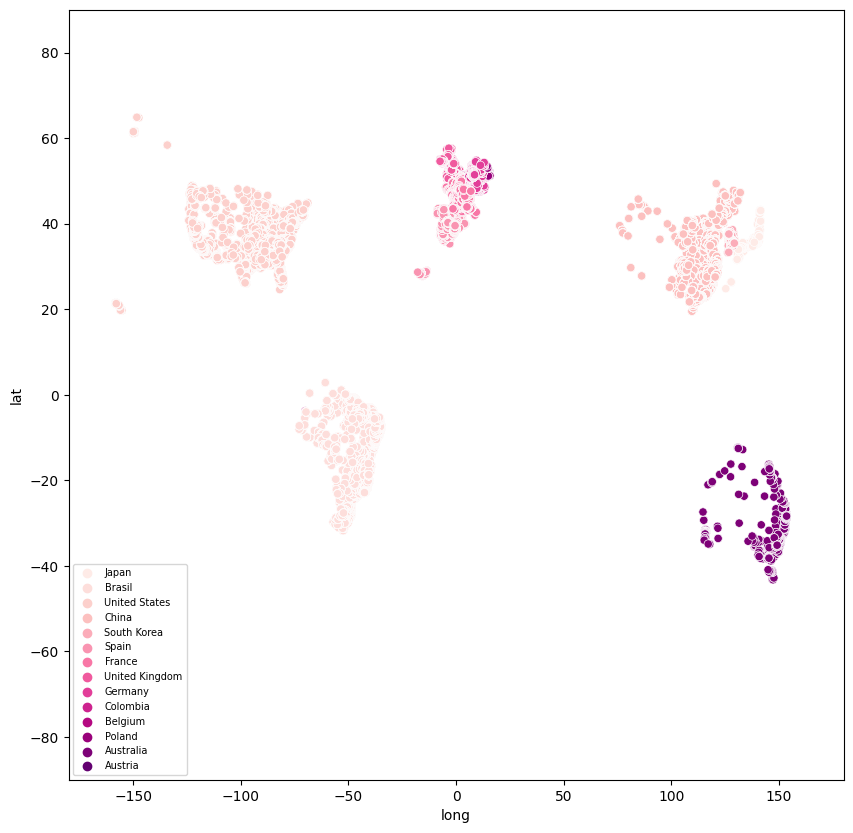

In [23]:
plt.figure(figsize = (10, 10))
sns.scatterplot(data = customers, x = 'long', y = 'lat', hue = 'country', palette = 'RdPu')
plt.legend(loc = 3, fontsize = 7)
plt.xlim([-180, 180])
plt.ylim([-90, 90])

<AxesSubplot:xlabel='long', ylabel='lat'>

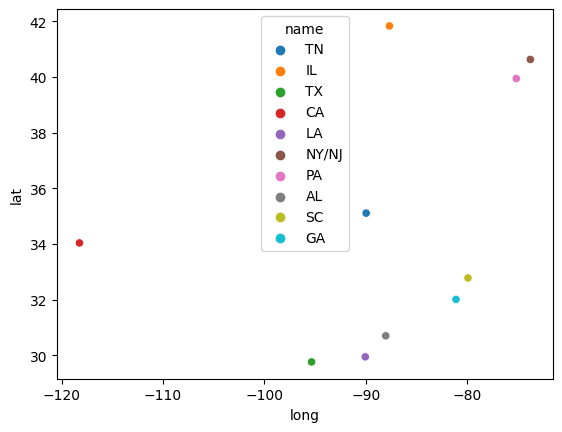

In [24]:
sns.scatterplot(data = fulfillment, x = 'long', y = 'lat', hue = 'name')

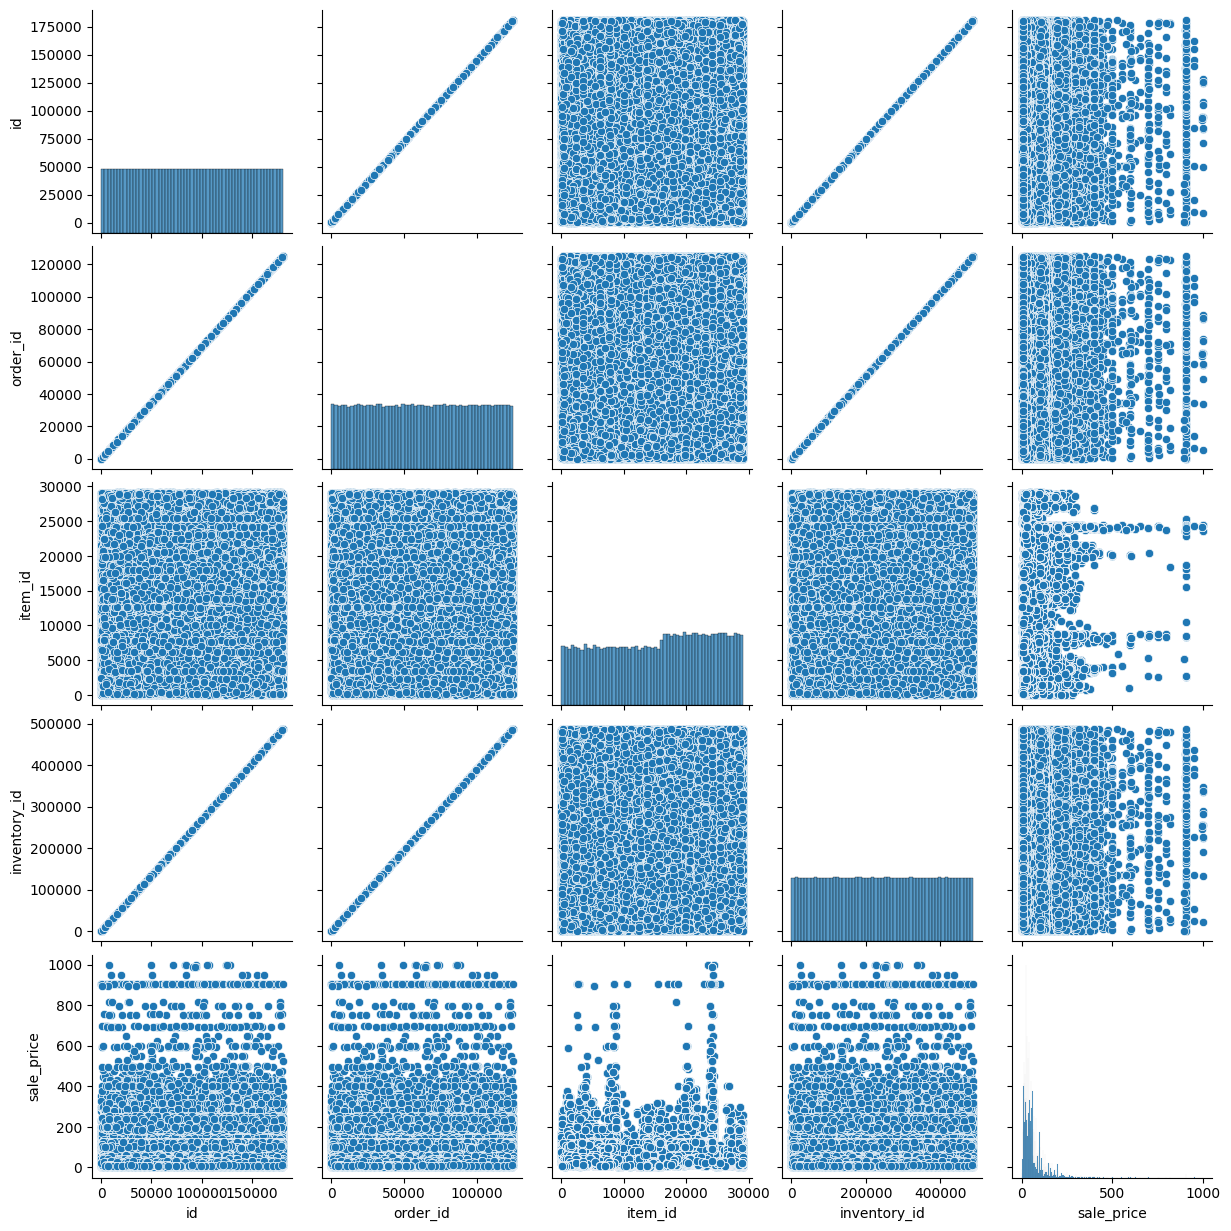

In [25]:
sns.pairplot(order_details)

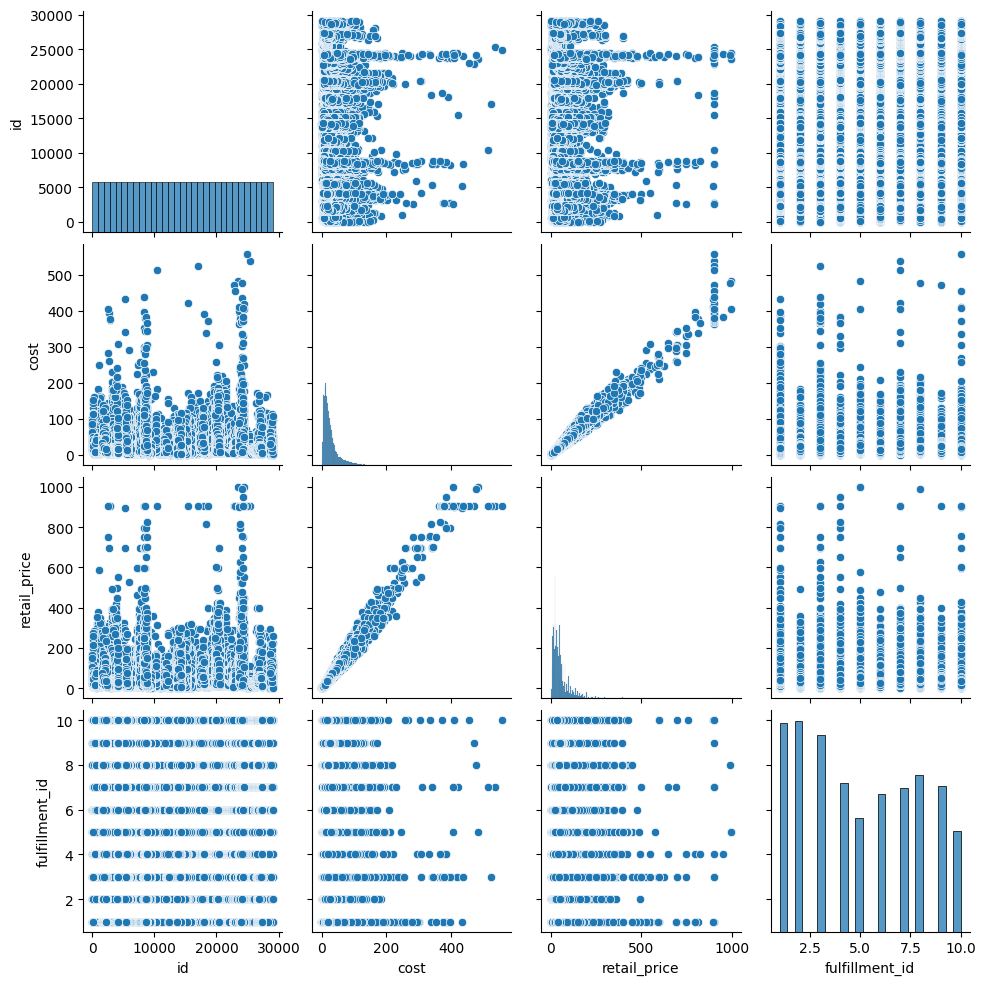

In [26]:
sns.pairplot(data = items)

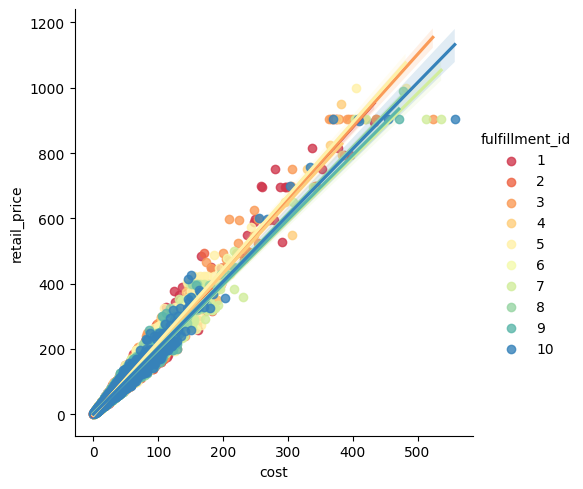

In [27]:
sns.lmplot(data = items, x = 'cost', y = 'retail_price', hue = 'fulfillment_id', palette = 'Spectral')

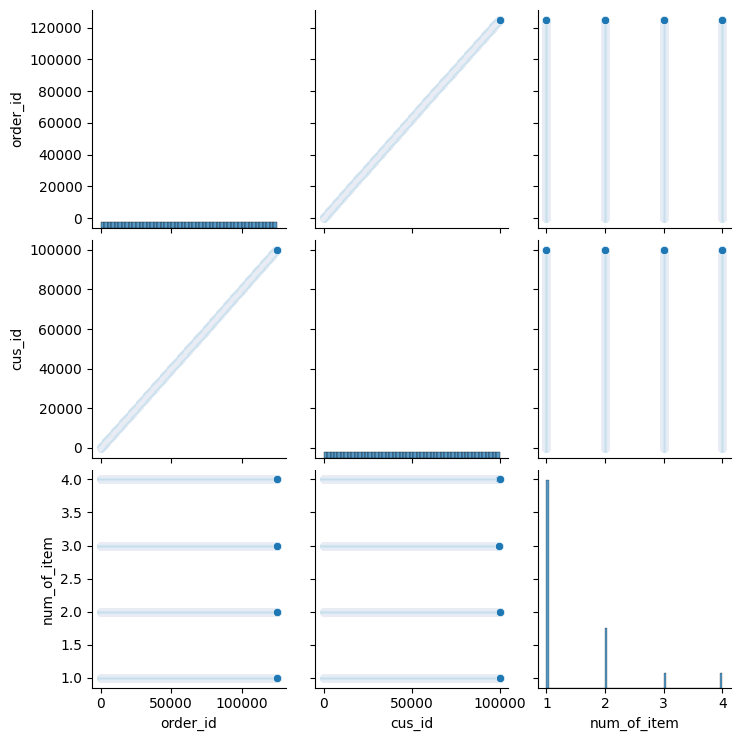

In [28]:
sns.pairplot(data = orders)

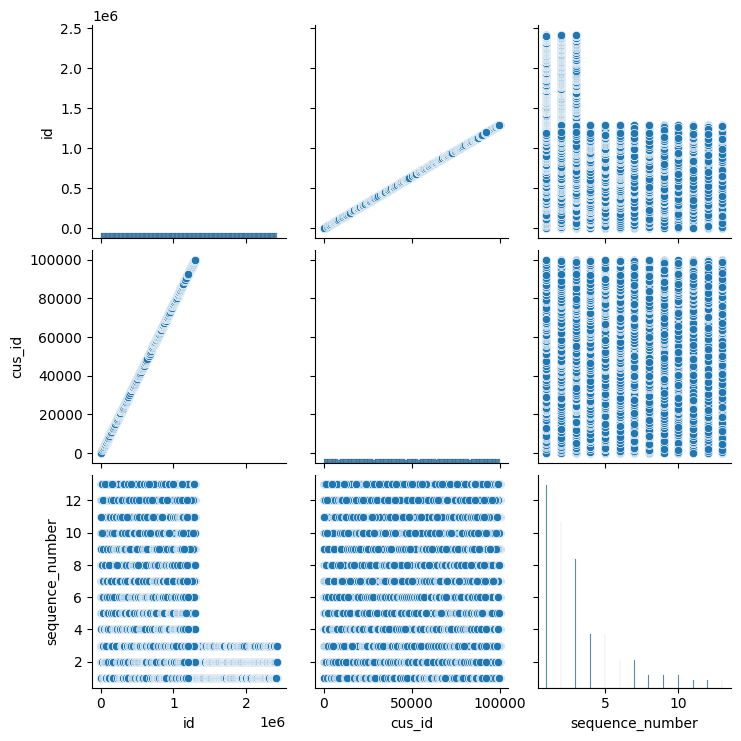

In [29]:
sns.pairplot(data = events)

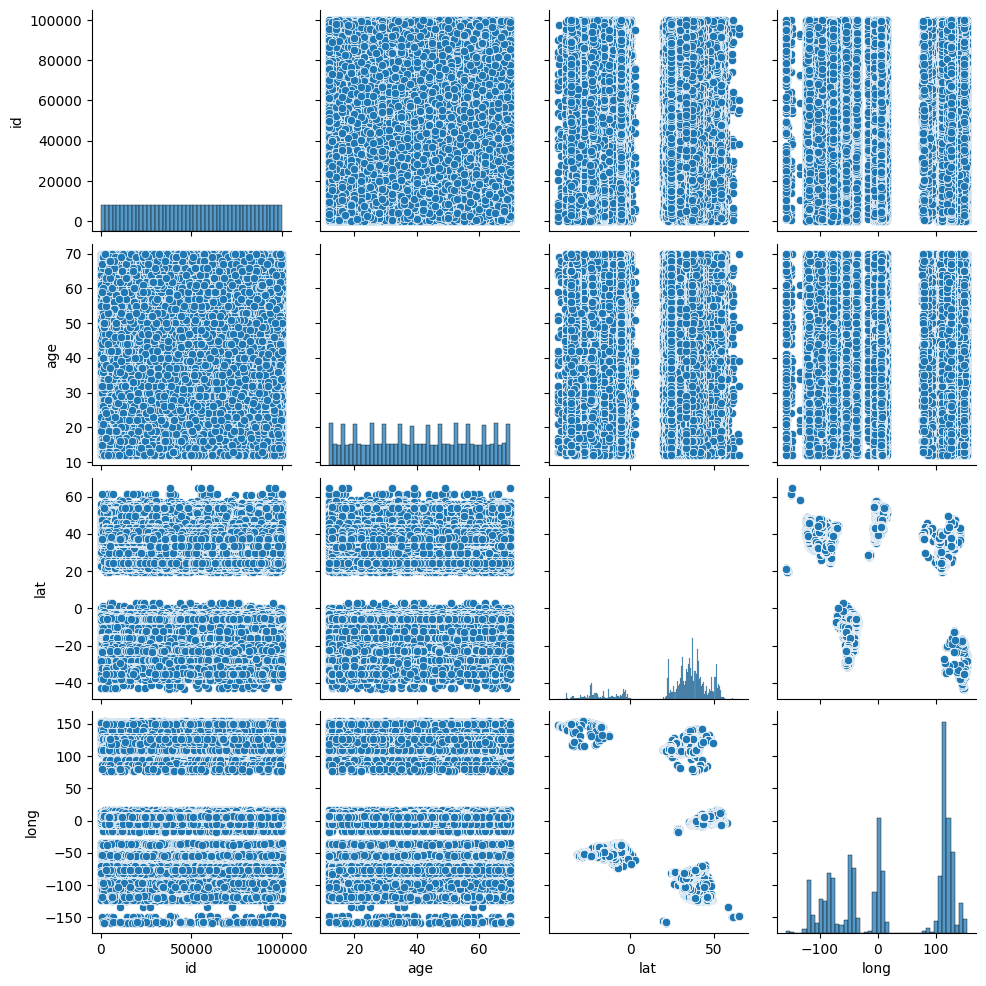

In [30]:
sns.pairplot(customers)

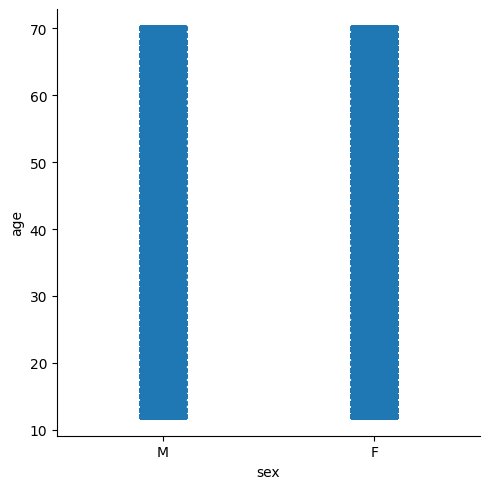

In [31]:
sns.catplot(data = customers, x = 'sex', y = 'age', dodge = True)

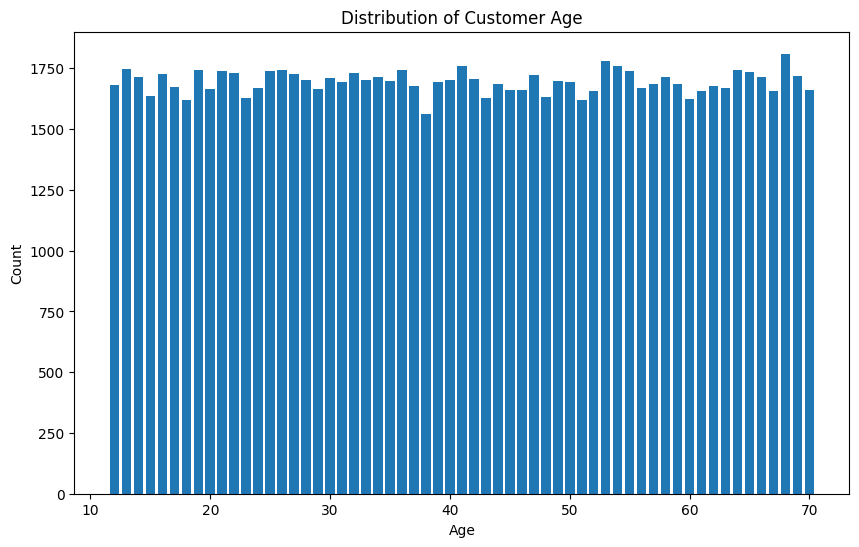

In [32]:
age_counts = customers['age'].value_counts()
sex_counts = customers['sex'].value_counts()
plt.figure(figsize=(10, 6))
plt.bar(age_counts.index, age_counts.values)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Customer Age')
plt.show()

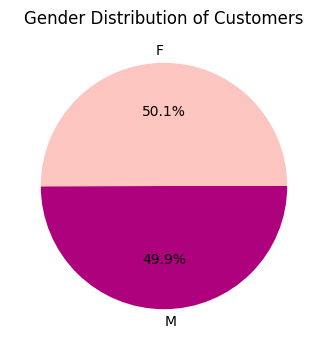

In [33]:
import matplotlib.cm as cm

cmap = cm.get_cmap('RdPu')
colors = cmap([0.25, 0.75])

plt.figure(figsize=(6, 4))
plt.pie(sex_counts.values, labels=sex_counts.index, autopct='%1.1f%%', colors = colors)
plt.title('Gender Distribution of Customers')
plt.show()

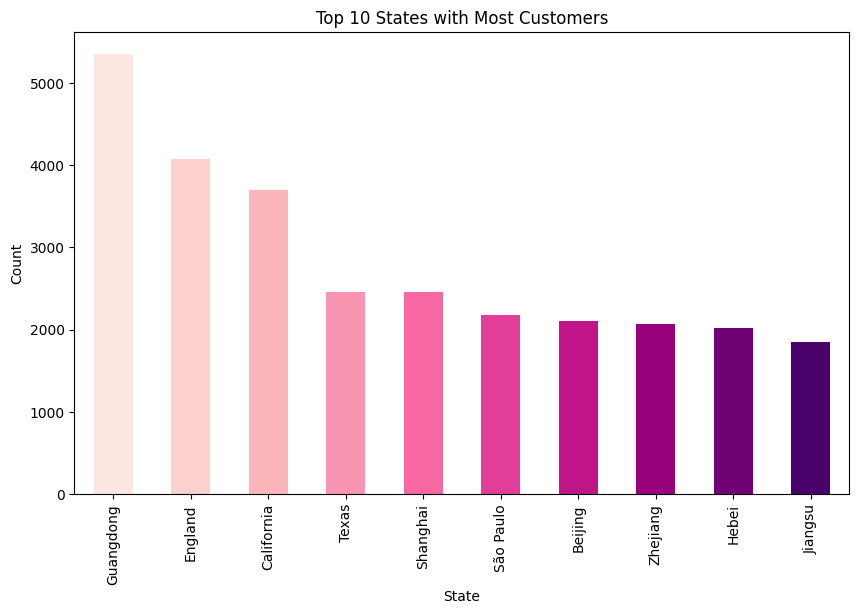

In [34]:
import matplotlib.cm as cm

cmap = cm.get_cmap('RdPu')
colors = cmap([x / 10 for x in range(1, 11)])

state_counts = customers['state'].value_counts()

plt.figure(figsize=(10, 6))
state_counts[:10].plot(kind='bar', color = colors)
plt.xlabel('State')
plt.ylabel('Count')
plt.title('Top 10 States with Most Customers')
plt.show()

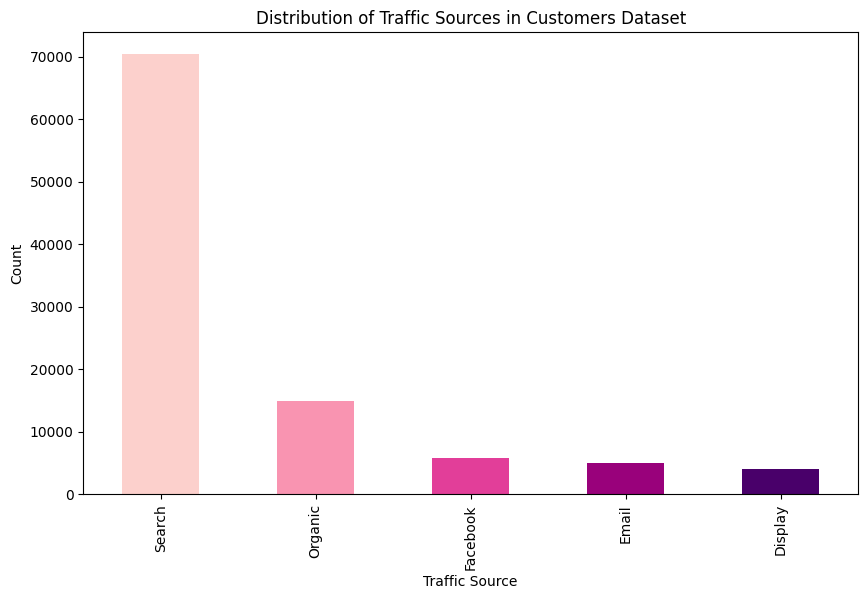

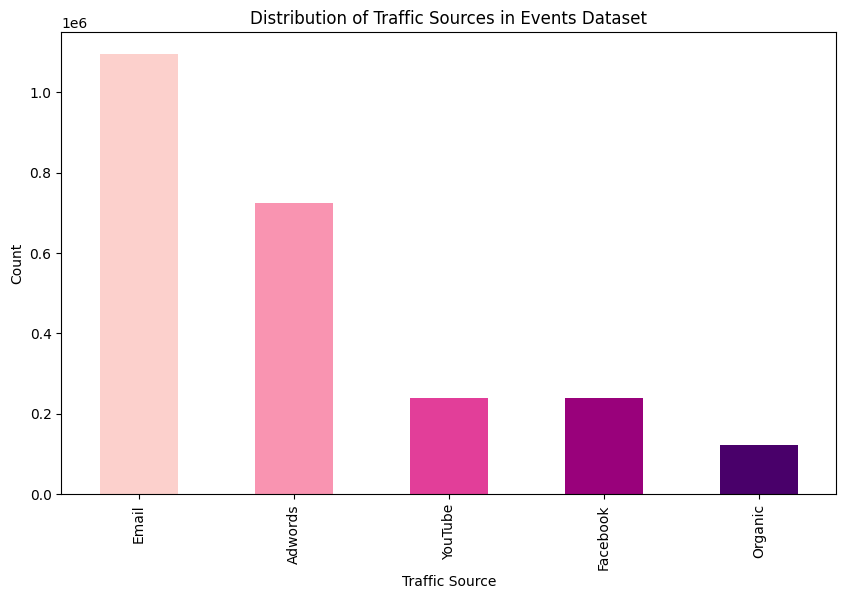

In [35]:
# Analyze traffic sources
traffic_src_counts = customers['traffic_src'].value_counts()
event_traffic_counts = events['traffic_src'].value_counts()

cmap = cm.get_cmap('RdPu')
colors = cmap([x / 5 for x in range(1, 6)])

# Visualize traffic sources
plt.figure(figsize=(10, 6))
traffic_src_counts.plot(kind='bar', color = colors)
plt.xlabel('Traffic Source')
plt.ylabel('Count')
plt.title('Distribution of Traffic Sources in Customers Dataset')
plt.show()

plt.figure(figsize=(10, 6))
event_traffic_counts.plot(kind='bar', color = colors)
plt.xlabel('Traffic Source')
plt.ylabel('Count')
plt.title('Distribution of Traffic Sources in Events Dataset')
plt.show()


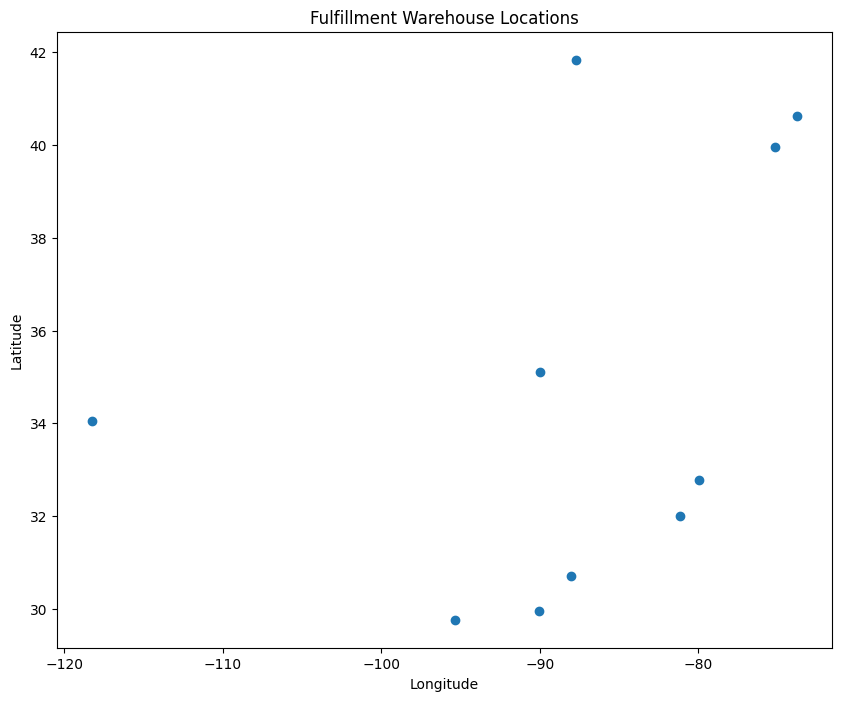

In [36]:
# Analyze fulfillment locations
warehouse_locations = fulfillment[['name', 'lat', 'long']]

# Visualize warehouse locations on a map (using latitude and longitude)
plt.figure(figsize=(10, 8))
plt.scatter(warehouse_locations['long'], warehouse_locations['lat'], marker='o')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Fulfillment Warehouse Locations')
plt.show()

# **I. STOCKOUT ANALYSIS**

## ***Stockout rate***
- Definition: Stockout rate is the percentage of items that are not available when needed for sale. It is calculated by dividing the **number of products not in stock** by the **total number of products that are in inventory and available for sale**.

In [37]:
# Tạo thêm một cột mới là 'stockout' trong dataset inventory
# Nếu như 'created_at' < 'sold_at' --> 'stockout' = True
# Còn lại thì cho False
inventory['stockout'] = (inventory['created_at'] < inventory['sold_at'])
inventory

,id,item_id,created_at,sold_at,stockout
0,58100,16898,2021-07-13 13:48:37+00:00,2021-07-25 22:59:37+00:00,True
1,58101,16898,2021-08-26 05:08:00+00:00,NaT,False
2,60386,16898,2022-04-04 06:22:56+00:00,2022-05-23 07:33:56+00:00,True
3,60387,16898,2020-03-15 09:37:00+00:00,NaT,False
4,60388,16898,2020-11-23 14:49:00+00:00,NaT,False
...,...,...,...,...,...
487896,376001,14392,2021-02-26 04:00:00+00:00,NaT,False
487897,376002,14392,2021-11-14 01:31:00+00:00,NaT,False
487898,378500,14392,2022-02-22 13:13:01+00:00,2022-04-06 07:34:01+00:00,True
487899,378501,14392,2021-12-03 03:32:00+00:00,NaT,False


In [38]:
# Sau đó, ta sẽ tính tỉ lệ stockout tổng của kho
stockout_rate = inventory.loc[inventory['stockout'] == True]['stockout'].count() / inventory.loc[inventory['stockout'] == False]['stockout'].count()
print("The overall stockout rate of the company's warehouse is approximately {}%".format(round(stockout_rate * 100, 2)))

The overall stockout rate of the company's warehouse is approximately 58.95%


In [39]:
# Calculate the total number of items for each item_id
total_items = inventory[inventory['stockout'] == False].groupby('item_id').size().reset_index(name='total_items')
total_items

,item_id,total_items
0,1,4
1,2,14
2,3,7
3,4,5
4,5,7
...,...,...
29049,29116,7
29050,29117,7
29051,29118,7
29052,29119,13


In [40]:
# Calculate the number of stockouts for each item_id
stockouts = inventory[inventory['stockout'] == True].groupby('item_id').size().reset_index(name='stockout_count')
stockouts

,item_id,stockout_count
0,1,2
1,2,7
2,3,4
3,4,3
4,5,5
...,...,...
29049,29116,5
29050,29117,5
29051,29118,4
29052,29119,8


In [41]:
# Merge the total_items and stockouts datasets
stockouts_rate = pd.merge(total_items, stockouts, on='item_id', how='left')
stockouts_rate

,item_id,total_items,stockout_count
0,1,4,2
1,2,14,7
2,3,7,4
3,4,5,3
4,5,7,5
...,...,...,...
29049,29116,7,5
29050,29117,7,5
29051,29118,7,4
29052,29119,13,8


In [42]:
# Calculate the stockout rate for each item
stockouts_rate['stockout_rate'] = stockouts_rate['stockout_count'] / stockouts_rate['total_items']
stockouts_rate = stockouts_rate.sort_values(by = 'stockout_rate', ascending = False)
stockouts_rate

,item_id,total_items,stockout_count,stockout_rate
11240,11281,3,3,1.000000
7848,7878,3,3,1.000000
26727,26792,5,5,1.000000
7763,7793,3,3,1.000000
7769,7799,7,7,1.000000
...,...,...,...,...
10455,10494,9,3,0.333333
16695,16749,3,1,0.333333
10372,10411,9,3,0.333333
2109,2118,3,1,0.333333


In [43]:
# Định vị các sản phẩm có stockout_rate = 1
stockouts_rate.loc[stockouts_rate['stockout_rate'] == 1.0]

,item_id,total_items,stockout_count,stockout_rate
11240,11281,3,3,1.0
7848,7878,3,3,1.0
26727,26792,5,5,1.0
7763,7793,3,3,1.0
7769,7799,7,7,1.0
...,...,...,...,...
14769,14821,3,3,1.0
14778,14830,2,2,1.0
14082,14132,5,5,1.0
541,543,3,3,1.0


In [44]:
# Merge the stockouts_rate and items datasets on the item_id column
stockouts_rate_items = pd.merge(stockouts_rate, items, left_on = 'item_id', right_on = 'id')
stockouts_rate_items = stockouts_rate_items.drop('id', axis = 1)
stockouts_rate_items

,item_id,total_items,stockout_count,stockout_rate,cost,category,brand,retail_price,department,fulfillment_id
0,11281,3,3,1.000000,9.716000,Intimates,DKNY,21.000000,Women,4
1,7878,3,3,1.000000,20.295821,Blazers & Jackets,LOTUSTRADERS,49.990002,Women,8
2,26792,5,5,1.000000,9.935500,Sleep & Lounge,DFDesigns,25.500000,Men,7
3,7793,3,3,1.000000,61.992000,Blazers & Jackets,Bailey 44,164.000000,Women,6
4,7799,7,7,1.000000,79.491001,Blazers & Jackets,Anne Klein,189.000000,Women,2
...,...,...,...,...,...,...,...,...,...,...
29049,10494,9,3,0.333333,7.590000,Intimates,Fruit of the Loom,14.000000,Women,10
29050,16749,3,1,0.333333,21.834441,Tops & Tees,Tri-Mountain,39.990002,Men,1
29051,10411,9,3,0.333333,34.020000,Intimates,Wacoal,60.000000,Women,8
29052,2118,3,1,0.333333,12.313550,Fashion Hoodies & Sweatshirts,Allegra K,26.290001,Women,9


In [45]:
# Group by category and brand and calculate the average stockout rate for each group
stockouts_rate_category = stockouts_rate_items.groupby('category')['stockout_rate'].mean().reset_index().sort_values(by = 'stockout_rate', ascending = False)
stockouts_rate_category

,category,stockout_rate
8,Jumpsuits & Rompers,0.644539
3,Clothing Sets,0.640755
10,Maternity,0.631058
4,Dresses,0.627848
16,Skirts,0.624304
19,Socks & Hosiery,0.622796
14,Plus,0.621444
2,Blazers & Jackets,0.620519
0,Accessories,0.620152
6,Intimates,0.619804


In [46]:
stockouts_rate_category.describe()

,stockout_rate
count,26.000000
mean,0.618735
std,0.009525
min,0.603762
25%,0.613754
50%,0.618011
75%,0.621213
max,0.644539


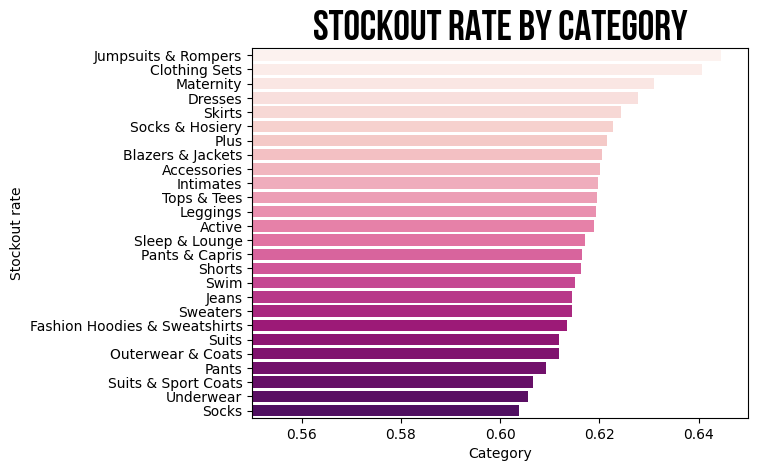

In [47]:
# Plot top 10 categories
sns.barplot(x = 'stockout_rate', y = 'category', data = stockouts_rate_category, palette = 'RdPu')
plt.xlim([0.55, 0.65])
plt.xlabel('Category')
plt.ylabel('Stockout rate')
plt.title('Stockout rate by category', fontdict = {
    'fontfamily': 'UTM Bebas',
    'fontsize': 30,
    'fontweight': 'bold'
})
plt.savefig('stockouts_by_category.png', dpi = 200, bbox_inches = 'tight')

- Nhìn vào đây, ta thấy rằng độ lệch chuẩn rất nhỏ = 0.009559, chứng tỏ rằng các stockout_rate của từng category lệch rất ít so với stockout_rate tổng của kho

In [48]:
# Ta sẽ liên kết bảng stockouts_rate_items và bảng fulfillment để kiểm tra xem kho nào có tỉ lệ stockout rate như thế nào
stockouts_rate_items_fulfillment = pd.merge(stockouts_rate_items, fulfillment, left_on = 'fulfillment_id', right_on = 'id')
stockouts_rate_items_fulfillment = stockouts_rate_items_fulfillment.drop('id', axis = 1)
stockouts_rate_items_fulfillment = stockouts_rate_items_fulfillment[['item_id', 'fulfillment_id', 'total_items', 'stockout_count', 'stockout_rate',
                                                                     'cost', 'category', 'brand', 'retail_price', 'department', 'name', 'lat', 'long']]
stockouts_rate_items_fulfillment

,item_id,fulfillment_id,total_items,stockout_count,stockout_rate,cost,category,brand,retail_price,department,name,lat,long
0,11281,4,3,3,1.000000,9.716000,Intimates,DKNY,21.000000,Women,CA,34.040176,-118.244589
1,7471,4,2,2,1.000000,31.130000,Blazers & Jackets,Volcom,95.000000,Women,CA,34.040176,-118.244589
2,26847,4,6,6,1.000000,13.778250,Sleep & Lounge,STATE O MAINE,32.889999,Men,CA,34.040176,-118.244589
3,7764,4,1,1,1.000000,18.701500,Blazers & Jackets,AxParis,44.500000,Women,CA,34.040176,-118.244589
4,26821,4,3,3,1.000000,19.614000,Sleep & Lounge,Tommy Bahama,46.000000,Men,CA,34.040176,-118.244589
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29049,1137,5,3,1,0.333333,44.472000,Sweaters,Design History,109.000000,Women,LA,29.947774,-90.061055
29050,8642,5,6,2,0.333333,114.748000,Outerwear & Coats,Barbour,279.000000,Women,LA,29.947774,-90.061055
29051,9186,5,6,2,0.333333,4.799920,Socks & Hosiery,K. Bell,12.990000,Women,LA,29.947774,-90.061055
29052,8656,5,6,2,0.333333,63.297381,Outerwear & Coats,Spiewak,129.830002,Women,LA,29.947774,-90.061055


In [49]:
# Nhóm total_items và stockout_count theo từng kho
stockouts_rate_by_warehouse = stockouts_rate_items_fulfillment.groupby('name').agg(
    total_items = ('total_items', 'sum'),
    stockout_count = ('stockout_count', 'sum')
).reset_index().sort_values(['total_items', 'stockout_count'])
stockouts_rate_by_warehouse

,name,total_items,stockout_count
2,GA,20025,11791
4,LA,21831,12882
5,NY/NJ,27608,16308
7,SC,28610,16824
6,PA,28885,16917
1,CA,29481,17383
0,AL,30855,18129
9,TX,38256,22584
3,IL,40356,23917
8,TN,41047,24212


In [50]:
# Tính tỉ lệ stockout rate của từng kho
stockouts_rate_by_warehouse['stockout_rate'] = stockouts_rate_by_warehouse['stockout_count'] / stockouts_rate_by_warehouse['total_items']
stockouts_rate_by_warehouse = stockouts_rate_by_warehouse.sort_values(by = 'total_items')
stockouts_rate_by_warehouse

,name,total_items,stockout_count,stockout_rate
2,GA,20025,11791,0.588814
4,LA,21831,12882,0.590078
5,NY/NJ,27608,16308,0.590698
7,SC,28610,16824,0.588046
6,PA,28885,16917,0.585667
1,CA,29481,17383,0.589634
0,AL,30855,18129,0.587555
9,TX,38256,22584,0.590339
3,IL,40356,23917,0.592650
8,TN,41047,24212,0.589860


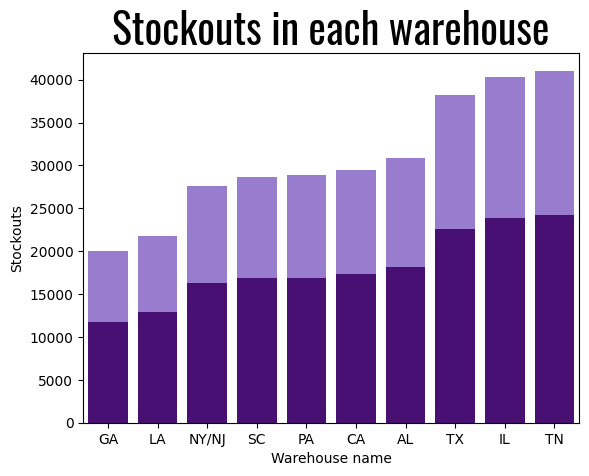

In [51]:
sns.barplot(x = 'name', y = 'total_items', data = stockouts_rate_by_warehouse, color = 'mediumpurple')
sns.barplot(x = 'name', y = 'stockout_count', data = stockouts_rate_by_warehouse, color = 'indigo')
plt.xlabel('Warehouse name')
plt.ylabel('Stockouts')
plt.title('Stockouts in each warehouse', fontdict = {
    'fontfamily': 'Oswald',
    'fontsize': 30,
    'fontweight': 'bold'
})
plt.savefig('warehouse_stockouts.png', dpi = 200, bbox_inches = 'tight')

### Nhận xét:
- Ta thấy rằng tỉ lệ stockout rate trong từng kho khá tương đương nhau (đều trên 50% và gần 60%)

## **_b. Monthly stockout frequency_**

In [52]:
# Calculate the monthly stockout frequency for each item
inventory['sold_month'] = inventory['sold_at'].dt.to_period('M')
monthly_stockouts = inventory[inventory['stockout'] == True].groupby(['item_id', 'sold_month']).size().reset_index(name='stockout_count').sort_values('sold_month')
stockouts_by_month = monthly_stockouts.groupby('sold_month')['stockout_count'].sum().reset_index()
stockouts_by_month

c:\Users\Acer\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arrays\datetimes.py:1143: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


,sold_month,stockout_count
0,2019-01,47
1,2019-02,149
2,2019-03,238
3,2019-04,354
4,2019-05,461
5,2019-06,640
6,2019-07,764
7,2019-08,824
8,2019-09,1000
9,2019-10,1164


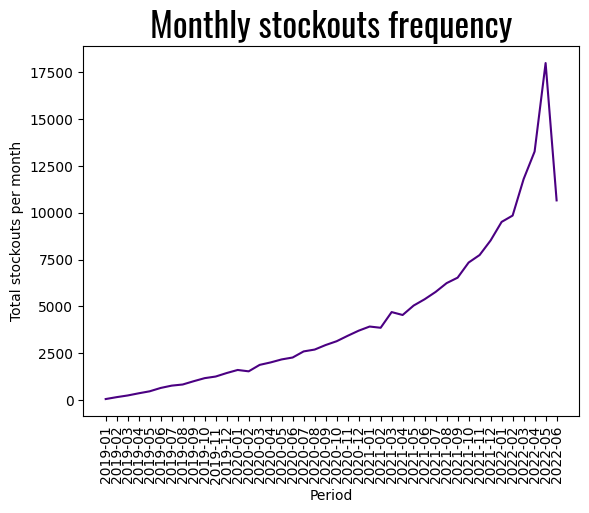

In [53]:
# Plot the total stockouts by month
plt.plot(stockouts_by_month['sold_month'].dt.strftime('%Y-%m'), stockouts_by_month['stockout_count'], color = 'indigo')
plt.xticks(rotation = 90)
plt.xlabel('Period')
plt.ylabel('Total stockouts per month')
plt.title('Monthly stockouts frequency', fontdict = {
    'fontfamily': 'Oswald',
    'fontsize': 25,
    'fontweight': 'bold'
})
plt.savefig('monthly_stockouts.png', dpi = 200, bbox_inches = 'tight')

### ***Nhận xét:***
- Ta thấy rằng từ 2019 --> 2022, số lượng stockouts hàng tháng tăng mạnh, đỉnh điểm vào thời điểm tháng 05/2022.

## **_c. Stockout impacts_**

In [54]:
orders_merged = pd.merge(orders, order_details, on = 'order_id')
orders_merged

,order_id,cus_id,status,sex,created_at,returned_at,shipped_at,delivered_at,num_of_item,id,item_id,inventory_id,sale_price
0,1,1,Returned,Male,2019-06-04 10:10:00+00:00,2019-06-08 20:53:00+00:00,2019-06-05 17:14:00+00:00,2019-06-08 15:55:00+00:00,2,1,27013,3,9.000000
1,1,1,Returned,Male,2019-06-04 10:10:00+00:00,2019-06-08 20:53:00+00:00,2019-06-05 17:14:00+00:00,2019-06-08 15:55:00+00:00,2,2,22635,5,54.990002
2,2,2,Processing,Female,2022-05-23 14:42:00+00:00,NaT,NaT,NaT,1,3,14419,9,58.990002
3,3,3,Complete,Male,2020-06-20 15:09:00+00:00,NaT,2020-06-21 12:14:00+00:00,2020-06-24 17:28:00+00:00,3,6,16443,17,25.000000
4,3,3,Complete,Male,2020-06-20 15:09:00+00:00,NaT,2020-06-21 12:14:00+00:00,2020-06-24 17:28:00+00:00,3,5,22932,15,28.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
180947,124920,99996,Shipped,Female,2022-04-17 03:17:00+00:00,NaT,2022-04-17 09:41:00+00:00,NaT,2,180948,9040,487892,11.900000
180948,124921,99997,Processing,Female,2022-03-28 17:19:00+00:00,NaT,NaT,NaT,1,180949,1318,487894,29.000000
180949,124922,99998,Complete,Male,2021-03-04 14:20:00+00:00,NaT,2021-03-06 16:19:00+00:00,2021-03-10 09:27:00+00:00,1,180950,21690,487897,86.000000
180950,124923,100000,Processing,Male,2022-05-02 00:16:00+00:00,NaT,NaT,NaT,2,180951,18656,487899,903.000000


In [55]:
# Calculate the total sales and revenue for each item
total_sales = orders_merged.groupby('item_id').agg({'num_of_item': 'sum', 'sale_price': 'sum'}).reset_index().sort_values('sale_price', ascending = False)
# Get the top 10 item_id with the highest sales
total_sales[:10]

,item_id,num_of_item,sale_price
18600,18656,31,13545.0
24367,24428,28,12642.0
24140,24201,17,9030.0
23992,24053,15,8127.0
18006,18062,23,8127.0
24280,24341,15,7600.0
18284,18340,12,7335.0
23890,23951,16,7224.0
15433,15486,14,7224.0
2783,2793,19,7224.0


In [56]:
# Calculate the total sales and revenue for each item during periods with and without stockouts
stockouts_merged = pd.merge(orders_merged, inventory, left_on='inventory_id', right_on='id')
stockouts_merged = stockouts_merged.drop('item_id_y', axis = 1)
stockouts_merged.sample(5)

,order_id,cus_id,status,sex,created_at_x,returned_at,shipped_at,delivered_at,num_of_item,id_x,item_id_x,inventory_id,sale_price,id_y,created_at_y,sold_at,stockout,sold_month
145970,100756,80467,Shipped,Female,2022-06-05 06:29:00+00:00,NaT,2022-06-05 23:15:00+00:00,NaT,1,145971,8522,393482,38.560001,393482,2021-03-12 15:15:00+00:00,NaT,False,NaT
93932,64785,51641,Cancelled,Male,2022-02-07 11:18:00+00:00,NaT,NaT,NaT,1,93933,17013,253005,14.950000,253005,2020-06-08 00:15:00+00:00,NaT,False,NaT
48686,33565,26734,Cancelled,Female,2022-04-14 17:33:00+00:00,NaT,NaT,NaT,1,48687,6344,130992,16.000000,130992,2020-09-23 13:19:00+00:00,NaT,False,NaT
108799,75112,59745,Returned,Female,2021-01-23 10:49:00+00:00,2021-01-26 02:00:00+00:00,2021-01-24 21:27:00+00:00,2021-01-24 23:13:00+00:00,2,108800,8202,293104,141.619995,293104,2021-06-10 07:50:00+00:00,NaT,False,NaT
154512,106673,85330,Complete,Female,2022-05-22 01:44:00+00:00,NaT,2022-05-23 17:33:00+00:00,2022-05-25 15:38:00+00:00,2,154514,8481,416426,260.000000,416426,2021-07-27 08:14:00+00:00,NaT,False,NaT


In [57]:
stockouts_sales = stockouts_merged.groupby(['item_id_x', 'stockout']).agg({'num_of_item': 'sum', 'sale_price': 'sum'}).reset_index()
stockouts_sales['revenue'] = stockouts_sales['num_of_item'] * stockouts_sales['sale_price']
stockouts_sales = stockouts_sales.sort_values(by = 'revenue', ascending = False)
# Get the top 10 items with the highest revenue
stockouts_sales[:10]

,item_id_x,stockout,num_of_item,sale_price,revenue
18600,18656,False,31,13545.000000,419895.000000
24367,24428,False,28,12642.000000,353976.000000
24181,24242,False,31,6374.150208,197598.656433
18006,18062,False,23,8127.000000,186921.000000
24140,24201,False,17,9030.000000,153510.000000
19595,19652,False,30,4732.000000,141960.000000
2783,2793,False,19,7224.000000,137256.000000
3124,3135,False,21,5940.000000,124740.000000
23992,24053,False,15,8127.000000,121905.000000
23890,23951,False,16,7224.000000,115584.000000


In [58]:
# Gộp với bảng items để lấy các category và brand
stockouts_sales = pd.merge(stockouts_sales, items, left_on = 'item_id_x', right_on = 'id', how = 'left')

In [59]:
stockouts_sales = stockouts_sales.drop('item_id_x', axis = 1)

In [60]:
stockouts_sales = stockouts_sales[['id', 'num_of_item', 'category', 'brand', 'department', 'sale_price', 'retail_price', 'revenue', 'cost', 'stockout']]
stockouts_sales['cost'] = stockouts_sales['cost'] * stockouts_sales['num_of_item']
stockouts_sales

,id,num_of_item,category,brand,department,sale_price,retail_price,revenue,cost,stockout
0,18656,31,Active,Jordan,Men,13545.000000,903.000000,419895.000000,11464.730056,False
1,24428,28,Outerwear & Coats,The North Face,Men,12642.000000,903.000000,353976.000000,11729.060043,False
2,24242,31,Outerwear & Coats,Arc'teryx,Men,6374.150208,374.950012,197598.656433,4600.562894,False
3,18062,23,Active,The North Face,Men,8127.000000,903.000000,186921.000000,8999.946046,False
4,24201,17,Outerwear & Coats,Jordan,Men,9030.000000,903.000000,153510.000000,6937.003025,False
...,...,...,...,...,...,...,...,...,...,...
29049,13612,1,Accessories,DG Eyewear,Women,7.980000,7.980000,7.980000,2.768060,False
29050,12265,1,Intimates,Alivila.Y Fashion,Women,2.990000,2.990000,2.990000,1.023570,False
29051,9220,1,Socks & Hosiery,Palmetto Fundraising,Women,2.950000,2.950000,2.950000,0.532800,False
29052,3049,1,Active,Palmetto Fundraising,Women,1.950000,1.950000,1.950000,1.216500,False


In [61]:
stockouts_sales_per_category = stockouts_sales.groupby(['id', 'category', 'brand', 'department']).agg(
     revenue = ('revenue', 'sum'),
     cost = ('cost', 'sum')
).reset_index()
stockouts_sales_per_category

,id,category,brand,department,revenue,cost
0,1,Tops & Tees,Seven7,Women,196.000000,52.096000
1,2,Tops & Tees,Calvin Klein,Women,7297.500000,556.897499
2,3,Tops & Tees,Calvin Klein Jeans,Women,2502.000000,373.544999
3,4,Tops & Tees,Bailey 44,Women,1944.000000,341.591999
4,5,Tops & Tees,Anne Klein,Women,4230.000000,467.621999
...,...,...,...,...,...,...
29025,29116,Accessories,Ray-Ban,Men,4070.400085,291.384325
29026,29117,Accessories,TUMI,Men,5400.000000,401.919998
29027,29118,Accessories,SPY,Men,3080.000000,275.939999
29028,29119,Accessories,TUMI,Men,5423.039795,270.429869


In [62]:
# Lấy top 5 category có revenue cao nhất cho department men
top_for_men = stockouts_sales_per_category.loc[stockouts_sales_per_category['department'] == 'Men'].groupby('category').agg(
     revenue = ('revenue', 'sum'),
     cost = ('cost', 'sum')
).reset_index().sort_values(by = 'revenue', ascending = False)
top_for_men_formatted = top_for_men.style.format({'revenue': '{:,.0f}', 'cost': '{:,.2f}'})
top_for_men

,category,revenue,cost
4,Outerwear & Coats,1.249447e+07,695646.019439
3,Jeans,1.238416e+07,806398.289949
9,Suits & Sport Coats,9.712946e+06,494594.616070
10,Sweaters,8.470503e+06,522639.195693
5,Pants,6.528557e+06,374211.273569
2,Fashion Hoodies & Sweatshirts,5.711425e+06,401112.416416
11,Swim,4.813666e+06,359787.658865
12,Tops & Tees,4.686826e+06,334138.743167
7,Sleep & Lounge,4.565941e+06,235985.311642
6,Shorts,4.467582e+06,292660.292484


C:\Users\Acer\AppData\Local\Temp\ipykernel_10960\2407519347.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0f}'.format(x) for x in ax.get_yticks()])


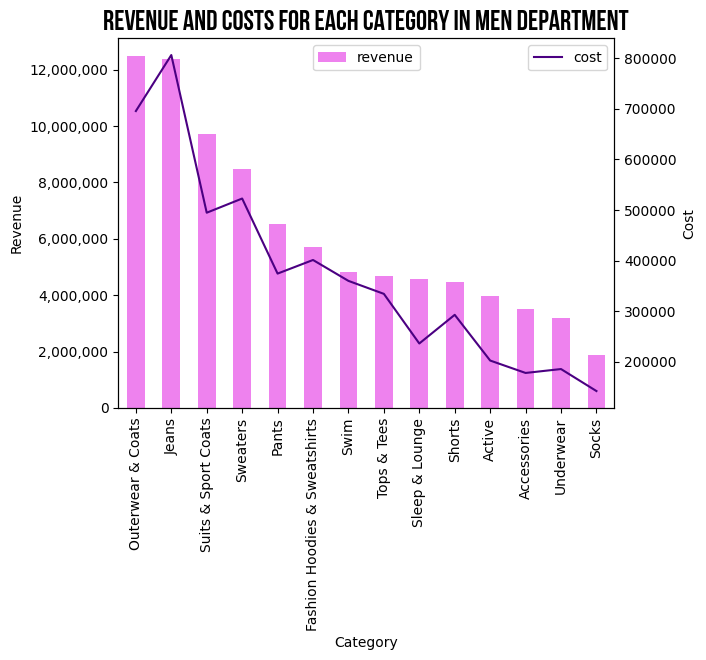

In [63]:
# Plot the category revenue and cost
ax = top_for_men.plot.bar(x='category', y='revenue', color='violet')
ax.set_ylabel('Revenue', loc = 'center')
ax.set_ylim(ax.get_ylim())
ax.set_yticklabels(['{:,.0f}'.format(x) for x in ax.get_yticks()])
ax.legend(loc = 'upper center')
ax.set_xlabel('Category')

ax2 = ax.twinx()
top_for_men.plot(x='category', y='cost', color='indigo', ax=ax2)
ax2.set_ylabel('Cost', loc = 'center')
ax2.legend(loc = 'best')


plt.title('Revenue and costs for each category in men department', fontdict = {
    'fontfamily': 'UTM Bebas',
    'fontsize': 20,
    'fontweight': 'bold'
})
plt.savefig('revenue_category_man.png', dpi = 200, bbox_inches = 'tight')

### Nhận xét:
- Ta thấy rằng category Outerwear & Coats và Jeans có *tổng doanh thu cao nhất*, đi kèm với *chi phí thuộc top cao nhất*. Cụ thể, category Outerwear & Coats có **doanh thu cao hơn một tí** và cũng có **chi phí thấp hơn** tương đối so với category Jeans
- Các category về sau như Fashion Hoodies & Sweatshirts, Swim, Tops & Tees, ..., Socks **không có sự chênh lệch quá nhiều** về tổng doanh thu, tuy nhiên các category Fashion Hoodies & Sweatshirts, Swim, Tops & Tees và Shorts có **chi phí nhập vào cao hơn** tương đối so với các category có doanh thu tương đương

In [64]:
# Làm điều tương tự cho departwoment wowomen
top_for_women = stockouts_sales_per_category.loc[stockouts_sales_per_category['department'] == 'Women'].groupby('category').agg(
     revenue = ('revenue', 'sum'),
     cost = ('cost', 'sum')
).reset_index().sort_values(by = 'revenue', ascending = False)
top_for_women

,category,revenue,cost
4,Dresses,5.887281e+06,394206.303512
11,Outerwear & Coats,5.859312e+06,400805.729078
6,Intimates,5.597990e+06,450270.614136
7,Jeans,5.584778e+06,458610.966115
20,Swim,4.210268e+06,263623.447391
19,Sweaters,3.670441e+06,252472.091691
2,Blazers & Jackets,3.648112e+06,208583.892197
5,Fashion Hoodies & Sweatshirts,3.273762e+06,225541.401299
10,Maternity,3.076143e+06,208195.380040
16,Sleep & Lounge,2.917681e+06,258157.875076


C:\Users\Acer\AppData\Local\Temp\ipykernel_10960\955162036.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0f}'.format(x) for x in ax.get_yticks()])
C:\Users\Acer\AppData\Local\Temp\ipykernel_10960\955162036.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(['{:,.0f}'.format(x) for x in ax.get_yticks()])


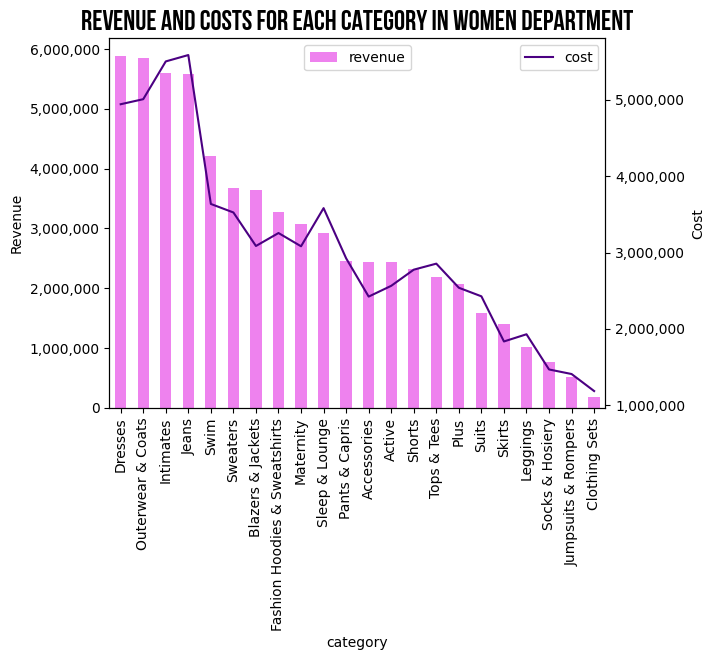

In [65]:
# Plot the category revenue and cost
ax = top_for_women.plot.bar(x='category', y='revenue', color='violet')
ax.set_ylabel('Revenue', loc = 'center')
ax.set_ylim(ax.get_ylim())
ax.set_yticklabels(['{:,.0f}'.format(x) for x in ax.get_yticks()])
ax.legend(loc = 'upper center')

ax2 = ax.twinx()
top_for_women.plot(x='category', y='cost', color='indigo', ax=ax2)
ax2.set_ylabel('Cost', loc = 'center')
ax2.set_yticklabels(['{:,.0f}'.format(x) for x in ax.get_yticks()])
ax2.legend(loc = 'best')

plt.xlabel('Category')
plt.title('Revenue and costs for each category in women department', fontdict = {
    'fontfamily': 'UTM Bebas',
    'fontsize': 20,
    'fontweight': 'bold'
})
plt.savefig('revenue_category_woman.png', dpi = 200, bbox_inches = 'tight')

### Nhận xét
- Trước nhất, ta thấy rằng số lượng category dành cho nữ sẽ **nhiều hơn** dành cho nam
- Doanh thu đạt cao nhất ở *các category Dresses và Outerwears & Coats*, tuy nhiên, chi phí cao nhất lại thuộc về *2 category Intimates và Jeans*
- Hầu hết các category đều đóng góp **doanh thu trên 1 tr USD** cho công ty, tuy nhiên các category cũng **đều tốn trên 100000 USD** chi phí nhập vào.

In [66]:
# Tiếp theo, ta sẽ khảo sát các thương hiệu đóng góp như thế nào trong top 2 category
# Ta sẽ nhóm cho các thương hiệu nằm trong category otw_and_coat cho department của nam trước
otw_and_coat_men = stockouts_sales.loc[(stockouts_sales['department'] == 'Men') & (stockouts_sales['category'] == 'Outerwear & Coats')].groupby(['category','brand']).agg(
     revenue = ('revenue', 'sum'), 
     cost = ('cost', 'sum')
).reset_index().sort_values('revenue', ascending = False)
otw_and_coat_men

,category,brand,revenue,cost
30,Outerwear & Coats,Carhartt,1.175622e+06,66069.345049
160,Outerwear & Coats,The North Face,1.042485e+06,49625.736094
9,Outerwear & Coats,Arc'teryx,5.865247e+05,28429.271705
39,Outerwear & Coats,Columbia,5.262517e+05,30255.898104
100,Outerwear & Coats,Marc New York by Andrew Marc,4.884784e+05,24736.670980
...,...,...,...,...
35,Outerwear & Coats,Cherokee,1.303500e+03,102.340704
5,Outerwear & Coats,Alki'i,8.635200e+02,60.107919
169,Outerwear & Coats,Turfer,4.192500e+02,57.732252
36,Outerwear & Coats,Chestnut Hill,2.079600e+02,45.423342


C:\Users\Acer\AppData\Local\Temp\ipykernel_10960\2957931036.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0f}'.format(x) for x in ax.get_yticks()])
C:\Users\Acer\AppData\Local\Temp\ipykernel_10960\2957931036.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(['{:,.0f}'.format(x) for x in ax.get_yticks()])


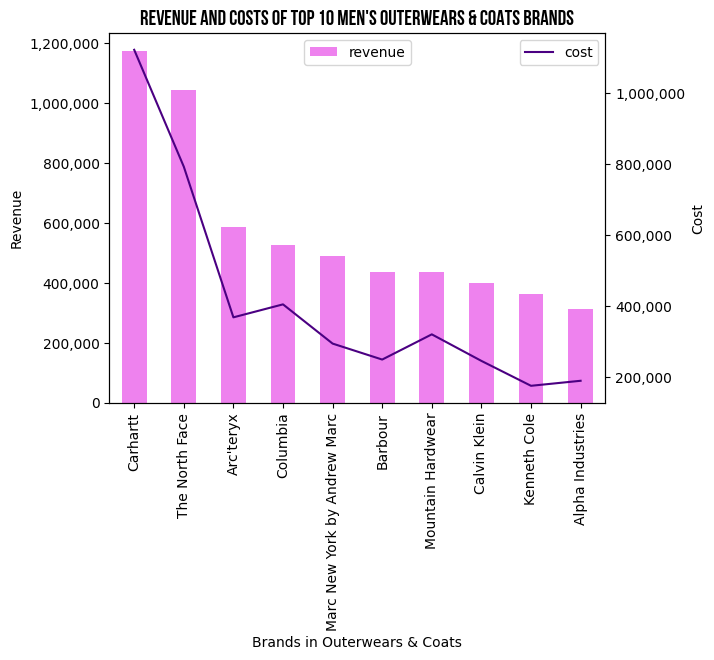

In [67]:
# Ta sẽ plot top 10 brand trong otw_and_coat
ax = otw_and_coat_men[:10].plot.bar(x='brand', y='revenue', color='violet')
ax.set_ylabel('Revenue')
ax.set_yticklabels(['{:,.0f}'.format(x) for x in ax.get_yticks()])
ax.legend(loc = 'upper center')
ax.set_xlabel('Brands in Outerwears & Coats')

ax2 = ax.twinx()
otw_and_coat_men[:10].plot(x='brand', y='cost', color='indigo', ax=ax2)
ax2.set_yticklabels(['{:,.0f}'.format(x) for x in ax.get_yticks()])
ax2.set_ylabel('Cost')

plt.title("Revenue and costs of top 10 men's Outerwears & Coats brands", fontdict = {
    'fontfamily': 'UTM Bebas',
    'fontsize': 15,
    'fontweight': 'bold'
})
plt.savefig('revenue_otw_man.png', dpi = 200, bbox_inches = 'tight')

### Nhận xét:
- Hai nhãn hàng đóng góp nhiều nhất vào doanh thu tổng của category Outerwears & Coats là Carhartt và The North Face, tuy nhiên chi phí nhập vào của nhãn hàng The North Face thấp hơn khá nhiều so với Carhartt --> Đây nên là nhãn hàng nên được ưu tiên nhập vào vì chi phí nhập rẻ.

In [68]:
# Đối với nữ, ta sẽ khảo sát ngành hàng Dresses
dresses_women = stockouts_sales.loc[(stockouts_sales['department'] == 'Women') & (stockouts_sales['category'] == 'Dresses')].groupby(['category','brand']).agg(
     revenue = ('revenue', 'sum'), 
     cost = ('cost', 'sum')
).reset_index().sort_values('revenue', ascending = False)
dresses_women

,category,brand,revenue,cost
23,Dresses,BCBGMAXAZRIA,453841.740952,29442.542127
78,Dresses,Jones New York,252835.990013,15365.752613
56,Dresses,French Connection,250400.479980,13373.259890
117,Dresses,Parker,231625.439453,16493.898433
62,Dresses,Halston Heritage,195730.468506,8846.839710
...,...,...,...,...
88,Dresses,LAT Sportswear,314.200001,73.450300
85,Dresses,Kirra,289.899998,69.720949
106,Dresses,Myne,264.000000,113.220000
139,Dresses,Soho Girls,161.819996,21.212399


C:\Users\Acer\AppData\Local\Temp\ipykernel_10960\1793396680.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0f}'.format(x) for x in ax.get_yticks()])


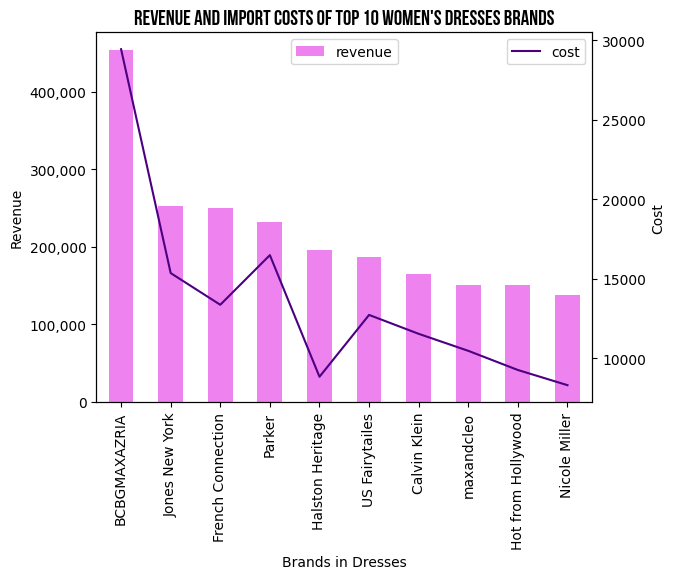

In [69]:
# Ta sẽ plot top 10 brand trong dresses
ax = dresses_women[:10].plot.bar(x='brand', y='revenue', color='violet')
ax.set_ylabel('Revenue')
ax.set_yticklabels(['{:,.0f}'.format(x) for x in ax.get_yticks()])
ax.legend(loc = 'upper center')
ax.set_xlabel('Brands in Dresses')

ax2 = ax.twinx()
dresses_women[:10].plot(x='brand', y='cost', color='indigo', ax=ax2)
ax2.set_ylabel('Cost')

plt.title("Revenue and import costs of top 10 women's Dresses brands", fontdict = {
    'fontfamily': 'UTM Bebas',
    'fontsize': 15,
    'fontweight': 'bold'
})
plt.savefig('revenue_dresses_women.png', dpi = 200, bbox_inches = 'tight')

### Nhận xét:
- Ta nhận thấy rằng nhãn hàng BCBGMAXAZRIA đóng góp một lượng đáng kể vào doanh thu của ngành hàng Dresses. Tuy nhiên, chi phí nhập hàng của hãng này còn khá cao. Trong khi đó, tuy Halston Heritage đóng góp không quá đáng kể nhưng chi phí nhập hàng của hãng này tương đối nhỏ. Đây có thể là một hãng đáng để nhập hàng.

## **_d. Data modelling_**

### *i. Sử dụng model SARIMA*

c:\Users\Acer\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Acer\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Acer\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\Acer\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('T

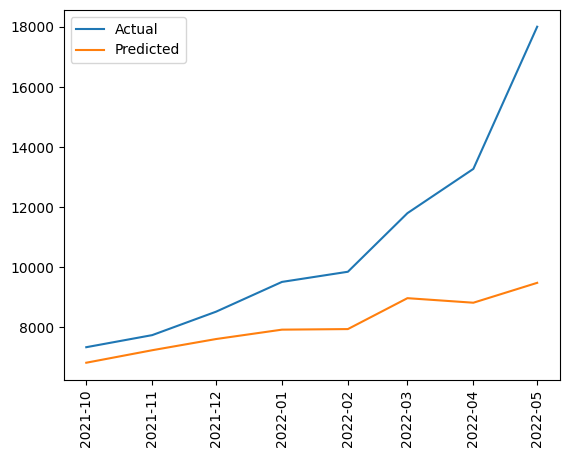

In [70]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

# Prepare the data for SARIMA
stockouts_sarima = stockouts_by_month.copy()
stockouts_sarima['sold_month'] = stockouts_sarima['sold_month'].dt.to_timestamp()
stockouts_sarima = stockouts_sarima.set_index('sold_month')['stockout_count']

# Split the data into training and test sets
train_data = stockouts_sarima[:-1][:int(0.8*(len(stockouts_sarima)))]
test_data = stockouts_sarima[:-1][int(0.8*(len(stockouts_sarima))):]

# Create and fit a SARIMA model on the training data
model = SARIMAX(train_data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
results = model.fit()

# Generate predictions for the test data
predictions = results.predict(start=len(train_data), end=len(train_data)+len(test_data)-1)

# Plot the actual values and the predicted values
plt.plot(test_data, label='Actual')
plt.plot(predictions, label='Predicted')
plt.xticks(rotation = 90)
plt.legend()
plt.show()

In [71]:
from math import sqrt
# Calculate the RMSE
rmse = sqrt(mean_squared_error(test_data, predictions))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 3672.665


c:\Users\Acer\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Acer\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


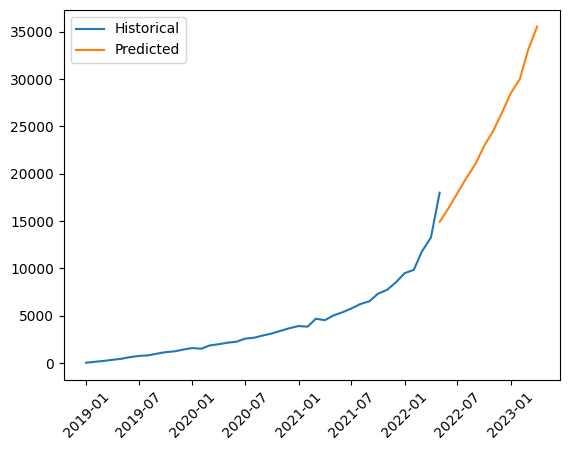

In [74]:
# Create and fit a SARIMA model on the entire data
model = SARIMAX(stockouts_sarima[:-2], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
results = model.fit()

# Generate predictions for the next n periods
n_periods = 12
predictions = results.get_forecast(steps=n_periods)

# Plot the historical data and the predicted values
plt.plot(stockouts_sarima[:-1].index, stockouts_sarima[:-1].values, label='Historical')
plt.plot(predictions.predicted_mean.index, predictions.predicted_mean.values, label='Predicted')
plt.xticks(rotation = 45)
plt.legend()
plt.savefig('SARIMA.png', dpi = 200, bbox_inches = 'tight')
plt.show()

### *ii. Sử dụng model ARIMA*

In [75]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Prepare the data for ARIMA
stockouts_arima = stockouts_by_month.copy()
stockouts_arima['sold_month'] = stockouts_arima['sold_month'].dt.to_timestamp()
stockouts_arima = stockouts_arima.set_index('sold_month')['stockout_count']

# Split the data into training and test sets
train_data = stockouts_arima[:-1][:int(0.8*(len(stockouts_arima)))]
test_data = stockouts_arima[:-1][int(0.8*(len(stockouts_arima))):]

# Create and fit an ARIMA model on the entire data
model = ARIMA(train_data, order=(1, 1, 1))
results = model.fit()

# Generate predictions for the next n periods
n_periods = 12
predictions = results.forecast(steps=n_periods)[0]

# Generate predictions for the test data
predictions = results.predict(start=len(train_data), end=len(train_data)+len(test_data)-1)

print(predictions)

2021-10-01    6821.735999
2021-11-01    7107.768930
2021-12-01    7392.108872
2022-01-01    7674.765847
2022-02-01    7955.749816
2022-03-01    8235.070680
2022-04-01    8512.738284
2022-05-01    8788.762412
Freq: MS, Name: predicted_mean, dtype: float64


c:\Users\Acer\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Acer\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Acer\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [76]:
# Calculate the RMSE
rmse = sqrt(mean_squared_error(test_data, predictions))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 4019.026


(array([18901., 18932., 18962., 18993., 19024., 19052., 19083., 19113.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

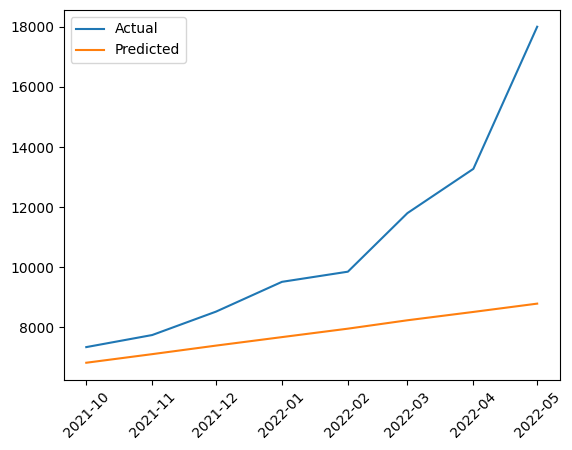

In [77]:
# Plot the actual values and the predicted values
plt.plot(test_data, label='Actual')
plt.plot(predictions, label='Predicted')
plt.legend()
plt.xticks(rotation = 45)

In [78]:
# Create and fit an ARIMA model on the entire data
model = ARIMA(stockouts_arima[:-1], order=(1, 1, 1))
results = model.fit()

# Generate predictions for the next n periods
n_periods = 12
predictions = results.forecast(steps=n_periods)

# Output the predictions
print(predictions)

2022-06-01    21520.739384
2022-07-01    25037.991855
2022-08-01    28554.757479
2022-09-01    32071.036325
2022-10-01    35586.828460
2022-11-01    39102.133950
2022-12-01    42616.952864
2023-01-01    46131.285269
2023-02-01    49645.131232
2023-03-01    53158.490820
2023-04-01    56671.364101
2023-05-01    60183.751142
Freq: MS, Name: predicted_mean, dtype: float64


c:\Users\Acer\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Acer\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Acer\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Acer\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


(array([17897., 18078., 18262., 18444., 18628., 18809., 18993., 19174.,
        19358., 19539.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

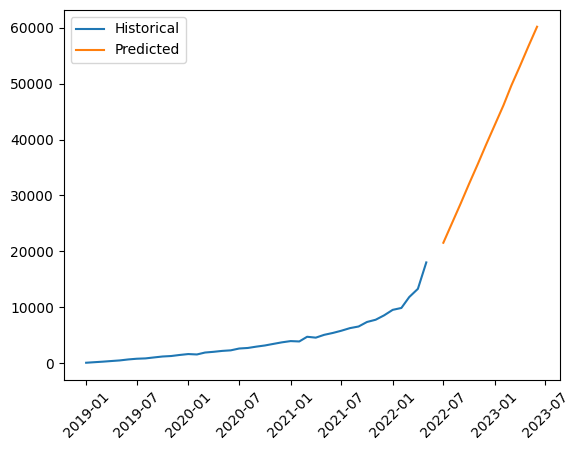

In [79]:
# Create a date range for the predicted values
dates = pd.date_range(start=stockouts_arima.index[-1], periods=n_periods+1, freq='MS')[1:]

# Plot the historical data and the predicted values
plt.plot(stockouts_arima[:-1].index, stockouts_arima[:-1].values, label='Historical')
plt.plot(dates, predictions, label='Predicted')
plt.legend()
plt.xticks(rotation = 45)

### *iii. Moving-average model*

In [80]:
stockouts_ma = stockouts_by_month.copy()
stockouts_ma['center_moving_avg'] = stockouts_ma['stockout_count'].rolling(window = 3, center = True).mean()
stockouts_ma = stockouts_ma[:-1]
stockouts_ma

,sold_month,stockout_count,center_moving_avg
0,2019-01,47,NaN
1,2019-02,149,144.666667
2,2019-03,238,247.000000
3,2019-04,354,351.000000
4,2019-05,461,485.000000
5,2019-06,640,621.666667
6,2019-07,764,742.666667
7,2019-08,824,862.666667
8,2019-09,1000,996.000000
9,2019-10,1164,1138.000000


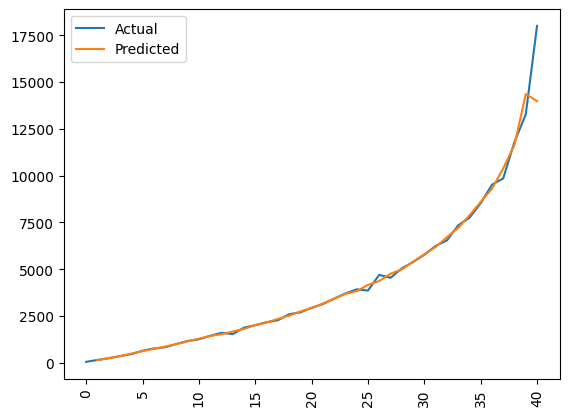

In [81]:
# Plot the actual values and the predicted values
plt.plot(stockouts_ma['stockout_count'], label='Actual')
plt.plot(stockouts_ma['center_moving_avg'], label='Predicted')
plt.xticks(rotation = 90)
plt.legend()

In [82]:
stockouts_ma['sold_month'] = stockouts_ma['sold_month'].dt.to_timestamp()
stockouts_ma = stockouts_ma.set_index('sold_month')
stockouts_ma_sr = stockouts_ma['center_moving_avg']

order = (1, 1, 1)
seasonal_order = (1, 1, 1, 12)
model = SARIMAX(stockouts_ma_sr, order=order, seasonal_order=seasonal_order)
results = model.fit()

forecast = results.get_forecast(steps = 12)

forecast.predicted_mean

c:\Users\Acer\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Acer\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Acer\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


2022-06-01    14977.909797
2022-07-01    15964.467360
2022-08-01    16935.977212
2022-09-01    18046.357073
2022-10-01    19133.993817
2022-11-01    20384.222565
2022-12-01    21695.535216
2023-01-01    22985.478106
2023-02-01    24666.021015
2023-03-01    26507.449392
2023-04-01    29815.110963
2023-05-01    30020.893077
Freq: MS, Name: predicted_mean, dtype: float64

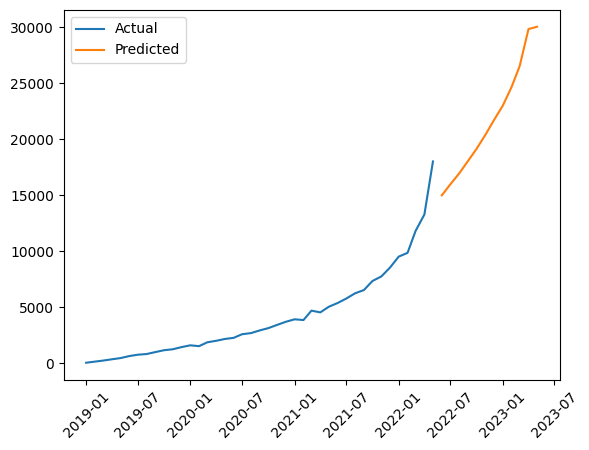

In [83]:
plt.plot(stockouts_ma['stockout_count'], label='Actual')
plt.plot(forecast.predicted_mean.index, forecast.predicted_mean.values, label='Predicted')
plt.xticks(rotation = 45)
plt.legend()
plt.show()

# **II. AVERAGE TIME DELIVERY ANALYSIS**

In [84]:
# Join the datasets
df1 = pd.merge(order_details, items, left_on='item_id', right_on = 'id', how='left')
df2 = pd.merge(df1, fulfillment, left_on='fulfillment_id', right_on = 'id', how='left')
df3 = pd.merge(df2, orders, on='order_id', how='left')
# Thay tên một số cột và drop một số cột trùng
df3 = df3[['id_x', 
           'order_id', 'status', 'created_at', 'returned_at', 'shipped_at', 'delivered_at',
           'item_id', 'category', 'brand', 'num_of_item',
           'fulfillment_id', 'name', 'lat', 'long',
           'inventory_id', 'sale_price', 'cost', 'retail_price', 
           'cus_id', 'sex',]]
df3 = df3.rename(columns = {'id_x': 'id'})
df3

,id,order_id,status,created_at,returned_at,shipped_at,delivered_at,item_id,category,brand,...,fulfillment_id,name,lat,long,inventory_id,sale_price,cost,retail_price,cus_id,sex
0,15721,10826,Shipped,2020-06-28 02:01:00+00:00,NaT,2020-06-29 04:40:00+00:00,NaT,13606,Accessories,Scarf_tradinginc,...,3,TX,29.765003,-95.360446,42278,2.50,1.60750,2.50,8614,Female
1,19167,13243,Shipped,2022-03-01 06:58:00+00:00,NaT,2022-03-01 20:48:00+00:00,NaT,13606,Accessories,Scarf_tradinginc,...,3,TX,29.765003,-95.360446,51560,2.50,1.60750,2.50,10505,Female
2,77007,53140,Shipped,2021-04-11 02:38:00+00:00,NaT,2021-04-14 00:32:00+00:00,NaT,13606,Accessories,Scarf_tradinginc,...,3,TX,29.765003,-95.360446,207367,2.50,1.60750,2.50,42340,Female
3,151639,104681,Shipped,2022-03-30 00:33:00+00:00,NaT,2022-03-30 12:41:00+00:00,NaT,13606,Accessories,Scarf_tradinginc,...,3,TX,29.765003,-95.360446,408715,2.50,1.60750,2.50,83704,Female
4,170817,117931,Shipped,2021-02-17 11:35:00+00:00,NaT,2021-02-19 19:03:00+00:00,NaT,13606,Accessories,Scarf_tradinginc,...,3,TX,29.765003,-95.360446,460556,2.50,1.60750,2.50,94363,Female
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180947,126133,87039,Complete,2021-09-03 02:55:00+00:00,NaT,2021-09-04 03:28:00+00:00,2021-09-06 02:46:00+00:00,3449,Dresses,Allegra K,...,9,SC,32.781522,-79.933734,339845,9.82,4.57972,9.82,69454,Female
180948,29532,20413,Returned,2022-05-13 05:39:00+00:00,2022-05-16 22:22:00+00:00,2022-05-14 06:19:00+00:00,2022-05-15 14:47:00+00:00,3449,Dresses,Allegra K,...,9,SC,32.781522,-79.933734,79513,9.82,4.57972,9.82,16195,Female
180949,90377,62343,Processing,2020-06-12 01:03:00+00:00,NaT,NaT,NaT,3449,Dresses,Allegra K,...,9,SC,32.781522,-79.933734,243461,9.82,4.57972,9.82,49701,Female
180950,121073,83537,Processing,2022-06-05 08:55:00+00:00,NaT,NaT,NaT,3449,Dresses,Allegra K,...,9,SC,32.781522,-79.933734,326127,9.82,4.57972,9.82,66628,Female


In [85]:
# Calculate delivery time for each order
df3['delivery_time'] = (pd.to_datetime(df3['delivered_at']) - pd.to_datetime(df3['created_at'])).dt.days
df3

,id,order_id,status,created_at,returned_at,shipped_at,delivered_at,item_id,category,brand,...,name,lat,long,inventory_id,sale_price,cost,retail_price,cus_id,sex,delivery_time
0,15721,10826,Shipped,2020-06-28 02:01:00+00:00,NaT,2020-06-29 04:40:00+00:00,NaT,13606,Accessories,Scarf_tradinginc,...,TX,29.765003,-95.360446,42278,2.50,1.60750,2.50,8614,Female,NaN
1,19167,13243,Shipped,2022-03-01 06:58:00+00:00,NaT,2022-03-01 20:48:00+00:00,NaT,13606,Accessories,Scarf_tradinginc,...,TX,29.765003,-95.360446,51560,2.50,1.60750,2.50,10505,Female,NaN
2,77007,53140,Shipped,2021-04-11 02:38:00+00:00,NaT,2021-04-14 00:32:00+00:00,NaT,13606,Accessories,Scarf_tradinginc,...,TX,29.765003,-95.360446,207367,2.50,1.60750,2.50,42340,Female,NaN
3,151639,104681,Shipped,2022-03-30 00:33:00+00:00,NaT,2022-03-30 12:41:00+00:00,NaT,13606,Accessories,Scarf_tradinginc,...,TX,29.765003,-95.360446,408715,2.50,1.60750,2.50,83704,Female,NaN
4,170817,117931,Shipped,2021-02-17 11:35:00+00:00,NaT,2021-02-19 19:03:00+00:00,NaT,13606,Accessories,Scarf_tradinginc,...,TX,29.765003,-95.360446,460556,2.50,1.60750,2.50,94363,Female,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180947,126133,87039,Complete,2021-09-03 02:55:00+00:00,NaT,2021-09-04 03:28:00+00:00,2021-09-06 02:46:00+00:00,3449,Dresses,Allegra K,...,SC,32.781522,-79.933734,339845,9.82,4.57972,9.82,69454,Female,2.0
180948,29532,20413,Returned,2022-05-13 05:39:00+00:00,2022-05-16 22:22:00+00:00,2022-05-14 06:19:00+00:00,2022-05-15 14:47:00+00:00,3449,Dresses,Allegra K,...,SC,32.781522,-79.933734,79513,9.82,4.57972,9.82,16195,Female,2.0
180949,90377,62343,Processing,2020-06-12 01:03:00+00:00,NaT,NaT,NaT,3449,Dresses,Allegra K,...,SC,32.781522,-79.933734,243461,9.82,4.57972,9.82,49701,Female,NaN
180950,121073,83537,Processing,2022-06-05 08:55:00+00:00,NaT,NaT,NaT,3449,Dresses,Allegra K,...,SC,32.781522,-79.933734,326127,9.82,4.57972,9.82,66628,Female,NaN


In [86]:
# Group by warehouse location and calculate average delivery time for each location
warehouse_location_avg_delivery_time = df3.loc[~df3['delivery_time'].isnull()].groupby('name')['delivery_time'].mean().reset_index()
warehouse_location_avg_delivery_time

,name,delivery_time
0,AL,3.500237
1,CA,3.489040
2,GA,3.470988
3,IL,3.507283
4,LA,3.456376
5,NY/NJ,3.480028
6,PA,3.487004
7,SC,3.476865
8,TN,3.510631
9,TX,3.522705


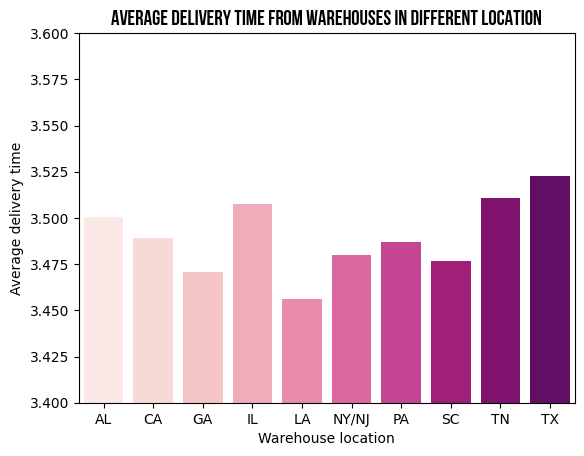

In [87]:
# Plot the graph representing the average delivery time from each warehouses
sns.barplot(x = 'name', y = 'delivery_time', data = warehouse_location_avg_delivery_time, palette = 'RdPu')
plt.xlabel('Warehouse location')
plt.ylabel('Average delivery time')
plt.title('Average delivery time from warehouses in different location', fontdict = {
    'fontfamily': 'UTM Bebas',
    'fontsize': 15,
    'fontweight': 'bold'
})
plt.ylim([3.4, 3.6])
plt.savefig('avg_delitime_warehouse.png', dpi = 200, bbox_inches = 'tight')

In [88]:
# Group by order size and calculate average delivery time for each size
order_size_avg_delivery_time = df3.loc[~df3['delivery_time'].isnull()].groupby('num_of_item')['delivery_time'].mean().reset_index()
order_size_avg_delivery_time

,num_of_item,delivery_time
0,1,3.488862
1,2,3.488396
2,3,3.466274
3,4,3.545623


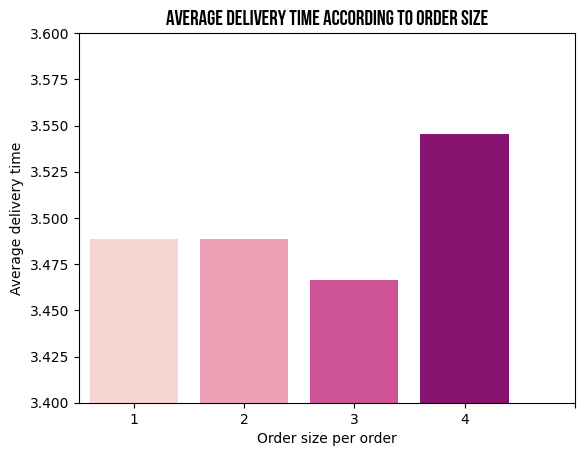

In [89]:
# Plot the average delivery time by order size
sns.barplot(x = 'num_of_item', y = 'delivery_time', data = order_size_avg_delivery_time, color = 'red', palette = 'RdPu')
plt.xlabel('Order size per order')
plt.ylabel('Average delivery time')
plt.title('Average delivery time according to order size', fontdict = {
    'fontfamily': 'UTM Bebas',
    'fontsize': 15,
    'fontweight': 'bold'
})
plt.xticks(range(0, 5))
plt.ylim([3.4, 3.6])
plt.savefig('avg_delitime_ordersize.png', dpi = 200, bbox_inches = 'tight')

In [90]:
# Extract month from created_at column
df3['month'] = pd.to_datetime(df3['created_at']).dt.month

In [91]:
# Group by month and calculate average delivery time for each month
month_avg_delivery_time = df3.groupby('month')['delivery_time'].mean().reset_index()
month_avg_delivery_time

,month,delivery_time
0,1,3.466285
1,2,3.525000
2,3,3.495181
3,4,3.512884
4,5,3.501063
5,6,3.483076
6,7,3.483622
7,8,3.493612
8,9,3.469305
9,10,3.547229


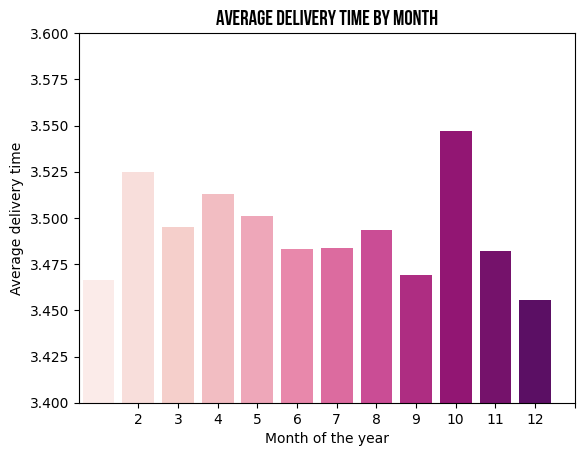

In [92]:
sns.barplot(x = 'month', y = 'delivery_time', data = month_avg_delivery_time, palette = 'RdPu')
plt.xlabel('Month of the year')
plt.ylabel('Average delivery time')
plt.title('Average delivery time by month', fontdict = {
    'fontfamily': 'UTM Bebas',
    'fontsize': 15,
    'fontweight': 'bold'
})
plt.xticks(range(1, 12 + 1))
plt.ylim([3.4, 3.6])
plt.savefig('avg_delitime_month.png', dpi = 200, bbox_inches = 'tight')

### ***Nhận xét***
- Warehouse location: The average delivery time ranges from about 3.45 days for the LA warehouse to about 3.52 days for the TX warehouse. This suggests that there may be some differences in delivery times depending on the warehouse location.
- Order size: The average delivery time ranges from about 3.47 days for orders with 3 items to about 3.55 days for orders with 4 items. This suggests that there may be some differences in delivery times depending on the size of the order.
- Seasonality: The average delivery time ranges from about 3.46 days in January to about 3.55 days in October. This suggests that there may be some seasonal variation in delivery times.

# **III. ORDER FULFILLMENT RATE**

## **_a. Order fulfillment rate and unfulfillment rate due to stockouts_**

In [93]:
# calculate the order fulfillment rate by dividing the number of fulfilled orders by the total number of orders
fulfilled_orders = orders[orders['status'] == 'Complete']
order_fulfillment_rate = len(fulfilled_orders) / len(orders)
print("The percentage of orders fulfilled is {}%".format(round(order_fulfillment_rate * 100, 2)))

The percentage of orders fulfilled is 24.84%


In [94]:
orders_order_details = pd.merge(orders, order_details, on = 'order_id')
inventory_merged = pd.merge(orders_order_details, inventory, left_on = 'inventory_id', right_on = 'id')
inventory_merged = inventory_merged[['id_x', 'cus_id', 'sex', 
                                     'order_id', 'status', 'created_at_x', 'returned_at', 'shipped_at', 'delivered_at', 
                                     'item_id_y', 'num_of_item',
                                     'inventory_id', 'sale_price', 'created_at_y', 'sold_at', 'stockout', 'sold_month']]
inventory_merged = inventory_merged.rename(columns = {
     'item_id_y': 'item_id',
     'created_at_y': 'inventory_created_at',
     'id_x': 'id',
     'sold_at': 'inventory_sold_at',
     'created_at_x': 'orders_created_at',
     'returned_at': 'orders_returned_at',
     'shipped_at': 'orders_shipped_at',
     'delivered_at': 'orders_delivered_at'
})
inventory_merged.loc[inventory_merged['status'] == 'Processing']

,id,cus_id,sex,order_id,status,orders_created_at,orders_returned_at,orders_shipped_at,orders_delivered_at,item_id,num_of_item,inventory_id,sale_price,inventory_created_at,inventory_sold_at,stockout,sold_month
2,3,2,Female,2,Processing,2022-05-23 14:42:00+00:00,NaT,NaT,NaT,14419,1,9,58.990002,2022-01-26 06:26:00+00:00,NaT,False,NaT
10,12,4,Female,6,Processing,2021-06-16 15:53:00+00:00,NaT,NaT,NaT,1589,2,34,48.000000,2020-08-04 07:26:00+00:00,NaT,False,NaT
11,11,4,Female,6,Processing,2021-06-16 15:53:00+00:00,NaT,NaT,NaT,11994,2,31,19.990000,2022-04-02 01:59:00+00:00,NaT,False,NaT
15,16,5,Male,8,Processing,2021-07-29 11:17:00+00:00,NaT,NaT,NaT,26148,1,43,24.000000,2022-05-15 15:12:00+00:00,NaT,False,NaT
24,25,10,Male,16,Processing,2022-06-05 01:48:00+00:00,NaT,NaT,NaT,18488,1,67,13.260000,2021-07-20 08:52:00+00:00,NaT,False,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180941,180942,99995,Male,124916,Processing,2021-05-21 05:13:00+00:00,NaT,NaT,NaT,26351,1,487871,14.900000,2021-12-02 11:32:00+00:00,NaT,False,NaT
180945,180946,99995,Male,124919,Processing,2021-02-19 05:13:00+00:00,NaT,NaT,NaT,25086,1,487885,9.000000,2020-11-30 15:22:00+00:00,NaT,False,NaT
180948,180949,99997,Female,124921,Processing,2022-03-28 17:19:00+00:00,NaT,NaT,NaT,1318,1,487894,29.000000,2020-11-11 15:48:00+00:00,NaT,False,NaT
180950,180951,100000,Male,124923,Processing,2022-05-02 00:16:00+00:00,NaT,NaT,NaT,18656,2,487899,903.000000,2022-05-21 01:16:00+00:00,NaT,False,NaT


In [95]:
inventory_merged.loc[(inventory_merged['status'] == 'Processing') & (inventory_merged['orders_created_at'] > inventory_merged['inventory_created_at'])]

,id,cus_id,sex,order_id,status,orders_created_at,orders_returned_at,orders_shipped_at,orders_delivered_at,item_id,num_of_item,inventory_id,sale_price,inventory_created_at,inventory_sold_at,stockout,sold_month
2,3,2,Female,2,Processing,2022-05-23 14:42:00+00:00,NaT,NaT,NaT,14419,1,9,58.990002,2022-01-26 06:26:00+00:00,NaT,False,NaT
10,12,4,Female,6,Processing,2021-06-16 15:53:00+00:00,NaT,NaT,NaT,1589,2,34,48.000000,2020-08-04 07:26:00+00:00,NaT,False,NaT
24,25,10,Male,16,Processing,2022-06-05 01:48:00+00:00,NaT,NaT,NaT,18488,1,67,13.260000,2021-07-20 08:52:00+00:00,NaT,False,NaT
52,53,27,Female,34,Processing,2022-05-03 07:30:00+00:00,NaT,NaT,NaT,6010,1,137,39.240002,2020-09-17 07:10:00+00:00,NaT,False,NaT
56,57,30,Female,37,Processing,2021-10-08 11:39:00+00:00,NaT,NaT,NaT,11879,1,149,62.000000,2020-02-24 17:41:00+00:00,NaT,False,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180920,180921,99988,Male,124901,Processing,2022-05-12 04:07:00+00:00,NaT,NaT,NaT,20416,2,487810,89.989998,2021-06-19 04:28:00+00:00,NaT,False,NaT
180933,180934,99992,Male,124911,Processing,2022-05-19 15:02:00+00:00,NaT,NaT,NaT,24127,1,487847,55.119999,2020-01-22 09:08:00+00:00,NaT,False,NaT
180945,180946,99995,Male,124919,Processing,2021-02-19 05:13:00+00:00,NaT,NaT,NaT,25086,1,487885,9.000000,2020-11-30 15:22:00+00:00,NaT,False,NaT
180948,180949,99997,Female,124921,Processing,2022-03-28 17:19:00+00:00,NaT,NaT,NaT,1318,1,487894,29.000000,2020-11-11 15:48:00+00:00,NaT,False,NaT


In [96]:
# Calculate the percentage of unfulfilled orders that were due to stockouts by filtering the merged dataframe to only include rows
# where the ‘status’ column is not ‘Complete’ and the ‘inventory_id’ column is NaN (indicating a stockout)
unfulfilled_orders = inventory_merged[(inventory_merged['status'] != 'Complete') & (inventory_merged['inventory_id'].isnull())]
percent_unfulfilled_due_to_stockouts = len(unfulfilled_orders) / len(inventory_merged) * 100
round(percent_unfulfilled_due_to_stockouts, 2)

0.0

### **_Nhận xét:_**
- Ta thấy rằng order fulfillment rate là 24,84%, có nghĩa là **chỉ khoảng một phần tư** tổng số đơn hàng được hoàn thành. Điều này cho thấy rằng **có thể có vấn đề nghiêm trọng** với quy trình thực hiện đơn hàng cần được giải quyết
- Tỷ lệ các đơn đặt hàng chưa được thực hiện do hết hàng là 0%, điều đó có nghĩa là việc hết hàng dường như **không phải là yếu tố chính** dẫn đến các đơn hàng chưa được thực hiện.

In [97]:
# Merge these datasets on the ‘fulfillment_id’ column to get information about the items stored in each warehouse
fulfillment_items = pd.merge(fulfillment, items, left_on='id', right_on='fulfillment_id', how='left')
fulfillment_items = fulfillment_items.drop('id_x', axis = 1)
fulfillment_items = fulfillment_items.rename(columns = {'id_y': 'item_id'})
fulfillment_items = fulfillment_items[['fulfillment_id', 'item_id', 'cost', 'category', 'brand',
        'name', 'lat', 'long', 'retail_price', 'department']]
fulfillment_items.sample(10)

,fulfillment_id,item_id,cost,category,brand,name,lat,long,retail_price,department
9626,3,2565,4.435600,Active,Hanes,TX,29.765003,-95.360446,8.490000,Women
20121,7,23843,68.170000,Outerwear & Coats,Mountain Hardwear,PA,39.947405,-75.167859,155.000000,Men
5373,2,15662,66.726601,Plus,Ray-Ban,IL,41.837615,-87.680856,127.150002,Women
27270,10,28287,39.315000,Swim,Ralph Lauren,GA,32.010593,-81.114336,69.500000,Men
12929,4,12791,13.821759,Swim,Speedo,CA,34.040176,-118.244589,36.759998,Women
11520,4,27470,26.632000,Swim,Speedo,CA,34.040176,-118.244589,48.000000,Men
8000,3,22206,32.396000,Pants,Fuzzdandy,TX,29.765003,-95.360446,67.000000,Men
23697,8,1069,12.700000,Sweaters,American Apparel,AL,30.702327,-88.041756,30.000000,Women
808,1,19565,6.887990,Sweaters,Canyon Ridge,TN,35.112119,-89.973777,17.490000,Men
3551,1,9809,14.869410,Sleep & Lounge,Touch of Europe Flannel Pants,TN,35.112119,-89.973777,24.990000,Women


In [98]:
# Then, Calculate the total number of items stored in each warehouse
total_items_per_warehouse = fulfillment_items.groupby(['fulfillment_id', 'name'])['item_id'].count().reset_index().sort_values('item_id', ascending = False)
total_items_per_warehouse = total_items_per_warehouse.rename(columns = {'name': 'name_of_warehouse', 'item_id': 'number_of_items'})
total_items_per_warehouse

,fulfillment_id,name_of_warehouse,number_of_items
1,2,IL,3929
0,1,TN,3891
2,3,TX,3667
7,8,AL,2919
3,4,CA,2761
8,9,SC,2719
6,7,PA,2669
5,6,NY/NJ,2572
4,5,LA,2112
9,10,GA,1881


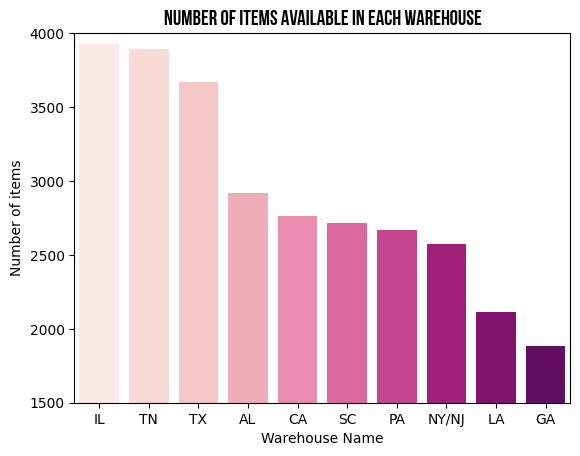

In [99]:
# Plot the total number of items stored in each warehouse
sns.barplot(x = 'name_of_warehouse', y = 'number_of_items', data = total_items_per_warehouse, palette = 'RdPu')
plt.xlabel('Warehouse Name')
plt.ylabel('Number of items')
plt.ylim([1500, 4000])
plt.title('Number of items available in each warehouse', fontdict = {
    'fontfamily': 'UTM Bebas',
    'fontsize': 15,
    'fontweight': 'bold'
})
plt.savefig('num_item_warehouse.png', dpi = 200, bbox_inches = 'tight')

### ***Nhận xét:***
- Tổng số vật phẩm trên mỗi kho khác nhau, trong đó kho `TN` có nhiều vật phẩm nhất (3891) và kho `GA` có ít vật phẩm nhất (1881). Điều này cho thấy **có thể có cơ hội tối ưu hóa** việc sử dụng công suất kho bằng cách phân phối lại hàng tồn kho giữa các kho

## **_c. Logistics delays_**

In [100]:
# average time between when an order is shipped and when it is delivered by subtracting the ‘shipped_at’ column from the ‘delivered_at’ column
orders['shipped_at'] = pd.to_datetime(orders['shipped_at'])
orders['delivered_at'] = pd.to_datetime(orders['delivered_at'])

orders['delivery_time'] = (orders['delivered_at'] - orders['shipped_at']).dt.total_seconds() / 86400

average_delivery_time = orders['delivery_time'].mean()
average_delivery_time

2.4977245706989617

### ***Nhận xét:***
- Cần khoảng **2.5 ngày** để có thể vận chuyển hàng từ cảng đến tay người tiêu dùng

## **_d. Order Processing Time_**

In [101]:
# First, convert created_at to datetimelike values
orders['created_at'] = pd.to_datetime(orders['created_at'])

orders['processing_time'] = (orders['shipped_at'] - orders['created_at']).dt.total_seconds() / 86400

average_processing_time = orders['processing_time'].mean()
average_processing_time

1.4958349999589755

### ***Nhận xét***
- Trung bình, công ty cần khoảng **1.5 ngày** để xác nhận đơn hàng và đưa hàng lên tàu vận chuyển.

## **_e. Returns and cancellations_**

In [102]:
returned_orders = orders[orders['status'] == 'Returned']
return_rate = len(returned_orders) / len(orders)
print("Tỉ lệ phần trăm đơn hàng bị trả lại là {}%".format(round(return_rate, 2) * 100))

cancelled_orders = orders[orders['status'] == 'Cancelled']
cancellation_rate = len(cancelled_orders) / len(orders)
print("Tỉ lệ phần trăm đơn hàng bị hủy là {}%".format(round(cancellation_rate, 2) * 100))

Tỉ lệ phần trăm đơn hàng bị trả lại là 10.0%
Tỉ lệ phần trăm đơn hàng bị hủy là 15.0%


## **_f. Percentage of different status_**

In [103]:
status = orders.groupby('status')['order_id'].count()
status

status
Cancelled     18723
Complete      31028
Processing    24948
Returned      12570
Shipped       37654
Name: order_id, dtype: int64

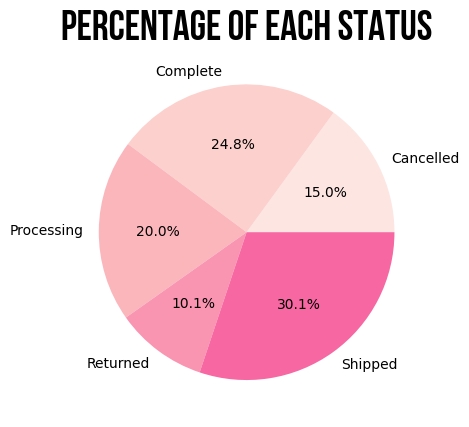

In [104]:
import matplotlib.cm as cm

cmap = cm.get_cmap('RdPu')
colors = cmap([0.1, 0.2, 0.3, 0.4, 0.5])

status.plot.pie(autopct = '%.1f%%', colors = colors)
plt.ylabel('')

plt.title('Percentage of each status', fontdict = {
    'fontfamily': 'UTM Bebas',
    'fontsize': 30,
    'fontweight': 'bold'
})
plt.savefig('pct_status.png', dpi = 200, bbox_inches = 'tight')

### **_Nhận xét_**:
- In general, we can see that there are about 30% of orders are in transit by vessels to port of destination, 25% of orders are being returned or cancelled. Nearly 25% of the orders have been completely delivered, and 20% are being processed and soon to be loaded for shipment

# **IV. WAREHOUSE CAPACITY UTILIZATION**

## **_a. Warehouse items_**

In [105]:
# merge the fulfillment dataframe with the items dataframe on the ‘id’ column from the fulfillment dataset
# and the ‘fulfillment_id’ column from the items dataset to get information about the items stored in each warehouse
fulfillment_items = pd.merge(fulfillment, items, left_on='id', right_on='fulfillment_id', how='left')
fulfillment_items = fulfillment_items.drop('id_x', axis = 1)
fulfillment_items = fulfillment_items.rename(columns = {'id_y': 'item_id'})
fulfillment_items = fulfillment_items[['fulfillment_id', 'item_id', 'name', 'lat', 'long', 'cost', 'category', 'brand',
       'retail_price', 'department']]
fulfillment_items

,fulfillment_id,item_id,name,lat,long,cost,category,brand,retail_price,department
0,1,27569,TN,35.112119,-89.973777,92.652563,Swim,2XU,150.410004,Men
1,1,27445,TN,35.112119,-89.973777,23.719661,Swim,TYR,38.990002,Men
2,1,27457,TN,35.112119,-89.973777,15.597600,Swim,TYR,27.600000,Men
3,1,27466,TN,35.112119,-89.973777,17.850000,Swim,TYR,30.000000,Men
4,1,27481,TN,35.112119,-89.973777,28.608001,Swim,TYR,45.950001,Men
...,...,...,...,...,...,...,...,...,...,...
29115,10,1993,GA,32.010593,-81.114336,22.650999,Fashion Hoodies & Sweatshirts,Comfort Colors,52.119999,Women
29116,10,2062,GA,32.010593,-81.114336,18.873360,Fashion Hoodies & Sweatshirts,Comfort Colors,39.860001,Women
29117,10,2308,GA,32.010593,-81.114336,8.928020,Fashion Hoodies & Sweatshirts,Comfort Colors,18.020000,Women
29118,10,1852,GA,32.010593,-81.114336,18.474240,Fashion Hoodies & Sweatshirts,DV by Dolce Vita,34.520000,Women


In [106]:
total_items_per_warehouse = fulfillment_items.groupby(['fulfillment_id', 'name'])['item_id'].count().reset_index().sort_values('item_id', ascending = False)
total_items_per_warehouse = total_items_per_warehouse.rename(columns = {'item_id': 'number_of_items'})
total_items_per_warehouse

,fulfillment_id,name,number_of_items
1,2,IL,3929
0,1,TN,3891
2,3,TX,3667
7,8,AL,2919
3,4,CA,2761
8,9,SC,2719
6,7,PA,2669
5,6,NY/NJ,2572
4,5,LA,2112
9,10,GA,1881


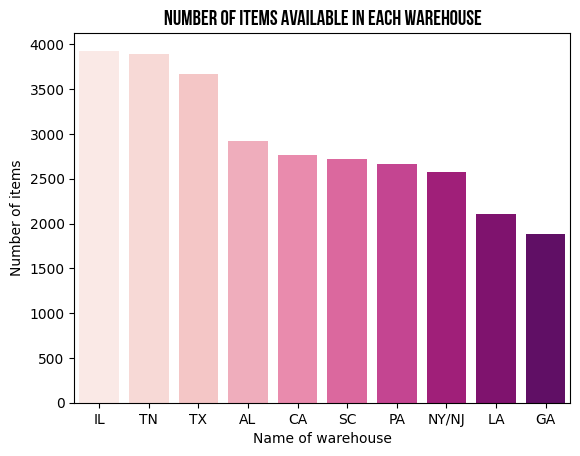

In [107]:
sns.barplot(x = 'name', y = 'number_of_items', data = total_items_per_warehouse, palette = 'RdPu')

plt.ylabel('Number of items')
plt.xlabel('Name of warehouse')

plt.title('Number of items available in each warehouse', fontdict = {
    'fontfamily': 'UTM Bebas',
    'fontsize': 15,
    'fontweight': 'bold'
})
plt.savefig('num_item_warehouse.png', dpi = 200, bbox_inches = 'tight')

In [108]:
average_items_per_warehouse = total_items_per_warehouse['number_of_items'].mean()
average_items_per_warehouse

2912.0

## **_b. Distribution of Items between warehouse_**

In [109]:
percent_items_per_warehouse = (total_items_per_warehouse['number_of_items'] / total_items_per_warehouse['number_of_items'].sum() * 100).reset_index()
percent_items_per_warehouse['index'] = total_items_per_warehouse['fulfillment_id']
percent_items_per_warehouse = percent_items_per_warehouse.rename(columns = {'index': 'fulfillment_id'})
percent_items_per_warehouse['name'] = total_items_per_warehouse['name']
percent_items_per_warehouse

,fulfillment_id,number_of_items,name
0,1,13.492445,TN
1,2,13.361951,IL
2,3,12.592720,TX
3,4,10.024038,CA
4,5,9.481456,LA
5,6,9.337225,NY/NJ
6,7,9.165522,PA
7,8,8.832418,AL
8,9,7.252747,SC
9,10,6.459478,GA


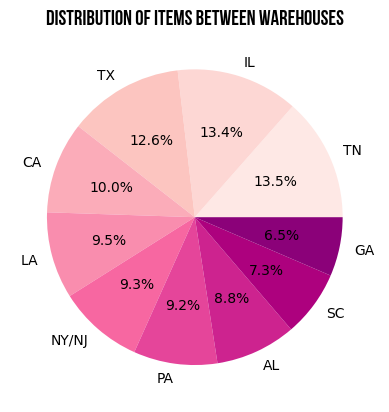

In [110]:
cmap = cm.get_cmap('RdPu')
colors = cmap([x / 12 for x in range(1, 11)])

plt.pie(percent_items_per_warehouse['number_of_items'], colors = colors, labels=percent_items_per_warehouse.name, autopct='%1.1f%%')
plt.title('Distribution of Items Between Warehouses', fontdict = {
    'fontfamily': 'UTM Bebas',
    'fontsize': 15,
    'fontweight': 'bold'
})
plt.savefig('dis.png')

### ***Nhận xét***
- Số lượng mặt hàng được lưu trữ trong mỗi kho khác nhau, trong đó kho IL có số lượng mặt hàng **cao nhất** (13,49% tổng số mặt hàng) và kho GA có số lượng mặt hàng thấp nhất (6,46% tổng số mặt hàng).

- Sự khác biệt về số lượng mặt hàng được lưu trữ giữa kho chứa nhiều mặt hàng nhất (IL) và kho chứa ít mặt hàng nhất (GA) là tương đối nhỏ, vào khoảng 7 điểm phần trăm.

- Việc phân phối các mặt hàng giữa các kho dường như tương đối cân bằng, không có kho nào lưu trữ tỷ lệ phần trăm tổng số mặt hàng cao hơn hoặc thấp hơn đáng kể so với các kho khác.